### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [8]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

[149]	validation_0-auc:0.90377	validation_1-auc:0.83346
[150]	validation_0-auc:0.90383	validation_1-auc:0.83338
[151]	validation_0-auc:0.90397	validation_1-auc:0.83334
[152]	validation_0-auc:0.90402	validation_1-auc:0.83337
[153]	validation_0-auc:0.90404	validation_1-auc:0.83333
[154]	validation_0-auc:0.90419	validation_1-auc:0.83327
[155]	validation_0-auc:0.90455	validation_1-auc:0.83326
[156]	validation_0-auc:0.90477	validation_1-auc:0.83323
[157]	validation_0-auc:0.90485	validation_1-auc:0.83327
[158]	validation_0-auc:0.90513	validation_1-auc:0.83334
[159]	validation_0-auc:0.90534	validation_1-auc:0.83340
[160]	validation_0-auc:0.90545	validation_1-auc:0.83336
[161]	validation_0-auc:0.90552	validation_1-auc:0.83330
[162]	validation_0-auc:0.90557	validation_1-auc:0.83320
[163]	validation_0-auc:0.90561	validation_1-auc:0.83325
[164]	validation_0-auc:0.90573	validation_1-auc:0.83324
[165]	validation_0-auc:0.90581	validation_1-auc:0.83325
[166]	validation_0-auc:0.90609	validation_1-auc:

In [10]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 3), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 3),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [12]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.76822	validation_1-auc:0.73120                                                                  
[1]	validation_0-auc:0.78102	validation_1-auc:0.74071                                                                  
[2]	validation_0-auc:0.78367	validation_1-auc:0.74517                                                                  
[3]	validation_0-auc:0.82697	validation_1-auc:0.79319                                                                  
[4]	validation_0-auc:0.82407	validation_1-auc:0.79231                                                                  
[5]	validation_0-auc:0.83728	validation_1-auc:0.80431                                                                  
[6]	validation_0-auc:0.84311	validation_1-auc:0.81052                                                                  
[7]	validation_0-auc:0.84755	validation_1-auc:0.81654                                                                  
[8]	validation_0-auc:0.84582	validation_

[68]	validation_0-auc:0.89068	validation_1-auc:0.83460                                                                 
[69]	validation_0-auc:0.89080	validation_1-auc:0.83457                                                                 
[70]	validation_0-auc:0.89113	validation_1-auc:0.83466                                                                 
[71]	validation_0-auc:0.89120	validation_1-auc:0.83481                                                                 
[72]	validation_0-auc:0.89157	validation_1-auc:0.83471                                                                 
[73]	validation_0-auc:0.89168	validation_1-auc:0.83470                                                                 
[74]	validation_0-auc:0.89233	validation_1-auc:0.83449                                                                 
[75]	validation_0-auc:0.89240	validation_1-auc:0.83433                                                                 
[76]	validation_0-auc:0.89262	validation

[50]	validation_0-auc:0.88813	validation_1-auc:0.83617                                                                 
[51]	validation_0-auc:0.88823	validation_1-auc:0.83631                                                                 
[52]	validation_0-auc:0.88897	validation_1-auc:0.83638                                                                 
[53]	validation_0-auc:0.88914	validation_1-auc:0.83649                                                                 
[54]	validation_0-auc:0.88932	validation_1-auc:0.83683                                                                 
[55]	validation_0-auc:0.88955	validation_1-auc:0.83700                                                                 
[56]	validation_0-auc:0.89019	validation_1-auc:0.83688                                                                 
[57]	validation_0-auc:0.89046	validation_1-auc:0.83700                                                                 
[58]	validation_0-auc:0.89109	validation

[31]	validation_0-auc:0.87504	validation_1-auc:0.83508                                                                 
[32]	validation_0-auc:0.87576	validation_1-auc:0.83592                                                                 
[33]	validation_0-auc:0.87619	validation_1-auc:0.83544                                                                 
[34]	validation_0-auc:0.87705	validation_1-auc:0.83645                                                                 
[35]	validation_0-auc:0.87804	validation_1-auc:0.83655                                                                 
[36]	validation_0-auc:0.87900	validation_1-auc:0.83685                                                                 
[37]	validation_0-auc:0.87973	validation_1-auc:0.83720                                                                 
[38]	validation_0-auc:0.88051	validation_1-auc:0.83726                                                                 
[39]	validation_0-auc:0.88126	validation

[99]	validation_0-auc:0.90023	validation_1-auc:0.83952                                                                 
[0]	validation_0-auc:0.79684	validation_1-auc:0.73856                                                                  
[1]	validation_0-auc:0.81328	validation_1-auc:0.74753                                                                  
[2]	validation_0-auc:0.81507	validation_1-auc:0.75154                                                                  
[3]	validation_0-auc:0.85749	validation_1-auc:0.79315                                                                  
[4]	validation_0-auc:0.85568	validation_1-auc:0.79352                                                                  
[5]	validation_0-auc:0.86475	validation_1-auc:0.80685                                                                  
[6]	validation_0-auc:0.86849	validation_1-auc:0.81320                                                                  
[7]	validation_0-auc:0.86740	validation_

[67]	validation_0-auc:0.91649	validation_1-auc:0.83208                                                                 
[68]	validation_0-auc:0.91677	validation_1-auc:0.83229                                                                 
[69]	validation_0-auc:0.91701	validation_1-auc:0.83262                                                                 
[70]	validation_0-auc:0.91739	validation_1-auc:0.83279                                                                 
[71]	validation_0-auc:0.91749	validation_1-auc:0.83294                                                                 
[72]	validation_0-auc:0.91814	validation_1-auc:0.83264                                                                 
[73]	validation_0-auc:0.91853	validation_1-auc:0.83251                                                                 
[74]	validation_0-auc:0.91866	validation_1-auc:0.83257                                                                 
[75]	validation_0-auc:0.91907	validation

[35]	validation_0-auc:0.90043	validation_1-auc:0.82404                                                                 
[36]	validation_0-auc:0.90113	validation_1-auc:0.82328                                                                 
[37]	validation_0-auc:0.90226	validation_1-auc:0.82483                                                                 
[38]	validation_0-auc:0.90394	validation_1-auc:0.82586                                                                 
[39]	validation_0-auc:0.90418	validation_1-auc:0.82572                                                                 
[40]	validation_0-auc:0.90552	validation_1-auc:0.82683                                                                 
[41]	validation_0-auc:0.90637	validation_1-auc:0.82779                                                                 
[42]	validation_0-auc:0.90738	validation_1-auc:0.82823                                                                 
[43]	validation_0-auc:0.90834	validation

[3]	validation_0-auc:0.85875	validation_1-auc:0.79807                                                                  
[4]	validation_0-auc:0.85653	validation_1-auc:0.79659                                                                  
[5]	validation_0-auc:0.86675	validation_1-auc:0.80833                                                                  
[6]	validation_0-auc:0.87085	validation_1-auc:0.81303                                                                  
[7]	validation_0-auc:0.86957	validation_1-auc:0.81183                                                                  
[8]	validation_0-auc:0.87101	validation_1-auc:0.81158                                                                  
[9]	validation_0-auc:0.87545	validation_1-auc:0.81570                                                                  
[10]	validation_0-auc:0.87406	validation_1-auc:0.81365                                                                 
[11]	validation_0-auc:0.87764	validation

[71]	validation_0-auc:0.91838	validation_1-auc:0.83194                                                                 
[72]	validation_0-auc:0.91878	validation_1-auc:0.83172                                                                 
[73]	validation_0-auc:0.91892	validation_1-auc:0.83161                                                                 
[74]	validation_0-auc:0.91902	validation_1-auc:0.83186                                                                 
[75]	validation_0-auc:0.91951	validation_1-auc:0.83185                                                                 
[76]	validation_0-auc:0.91981	validation_1-auc:0.83186                                                                 
[77]	validation_0-auc:0.91988	validation_1-auc:0.83203                                                                 
[78]	validation_0-auc:0.92022	validation_1-auc:0.83194                                                                 
[79]	validation_0-auc:0.92059	validation

[39]	validation_0-auc:0.92054	validation_1-auc:0.82961                                                                 
[40]	validation_0-auc:0.92114	validation_1-auc:0.82921                                                                 
[41]	validation_0-auc:0.92123	validation_1-auc:0.82933                                                                 
[42]	validation_0-auc:0.92139	validation_1-auc:0.82922                                                                 
[43]	validation_0-auc:0.92209	validation_1-auc:0.82903                                                                 
[44]	validation_0-auc:0.92233	validation_1-auc:0.82916                                                                 
[45]	validation_0-auc:0.92278	validation_1-auc:0.82906                                                                 
[46]	validation_0-auc:0.92298	validation_1-auc:0.82885                                                                 
[47]	validation_0-auc:0.92311	validation

[44]	validation_0-auc:0.92580	validation_1-auc:0.83272                                                                 
[45]	validation_0-auc:0.92609	validation_1-auc:0.83257                                                                 
[46]	validation_0-auc:0.92670	validation_1-auc:0.83273                                                                 
[47]	validation_0-auc:0.92701	validation_1-auc:0.83251                                                                 
[48]	validation_0-auc:0.92708	validation_1-auc:0.83263                                                                 
[49]	validation_0-auc:0.92735	validation_1-auc:0.83267                                                                 
[50]	validation_0-auc:0.92884	validation_1-auc:0.83278                                                                 
[51]	validation_0-auc:0.92961	validation_1-auc:0.83266                                                                 
[52]	validation_0-auc:0.92981	validation

[39]	validation_0-auc:0.92430	validation_1-auc:0.83009                                                                 
[40]	validation_0-auc:0.92544	validation_1-auc:0.82992                                                                 
[41]	validation_0-auc:0.92609	validation_1-auc:0.82991                                                                 
[42]	validation_0-auc:0.92632	validation_1-auc:0.82994                                                                 
[43]	validation_0-auc:0.92659	validation_1-auc:0.83006                                                                 
[44]	validation_0-auc:0.92704	validation_1-auc:0.83002                                                                 
[45]	validation_0-auc:0.92761	validation_1-auc:0.83018                                                                 
[46]	validation_0-auc:0.92795	validation_1-auc:0.83029                                                                 
[47]	validation_0-auc:0.92846	validation

[40]	validation_0-auc:0.89972	validation_1-auc:0.82782                                                                 
[41]	validation_0-auc:0.90031	validation_1-auc:0.82831                                                                 
[42]	validation_0-auc:0.90125	validation_1-auc:0.82878                                                                 
[43]	validation_0-auc:0.90188	validation_1-auc:0.82917                                                                 
[44]	validation_0-auc:0.90287	validation_1-auc:0.82919                                                                 
[45]	validation_0-auc:0.90331	validation_1-auc:0.82973                                                                 
[46]	validation_0-auc:0.90367	validation_1-auc:0.83031                                                                 
[47]	validation_0-auc:0.90382	validation_1-auc:0.82968                                                                 
[48]	validation_0-auc:0.90398	validation

[8]	validation_0-auc:0.86797	validation_1-auc:0.80678                                                                  
[9]	validation_0-auc:0.87424	validation_1-auc:0.81242                                                                  
[10]	validation_0-auc:0.87288	validation_1-auc:0.80960                                                                 
[11]	validation_0-auc:0.87679	validation_1-auc:0.81370                                                                 
[12]	validation_0-auc:0.87533	validation_1-auc:0.81155                                                                 
[13]	validation_0-auc:0.87490	validation_1-auc:0.81084                                                                 
[14]	validation_0-auc:0.87430	validation_1-auc:0.80995                                                                 
[15]	validation_0-auc:0.87363	validation_1-auc:0.80886                                                                 
[16]	validation_0-auc:0.87711	validation

[76]	validation_0-auc:0.91619	validation_1-auc:0.83142                                                                 
[77]	validation_0-auc:0.91641	validation_1-auc:0.83177                                                                 
[78]	validation_0-auc:0.91688	validation_1-auc:0.83138                                                                 
[79]	validation_0-auc:0.91733	validation_1-auc:0.83109                                                                 
[80]	validation_0-auc:0.91775	validation_1-auc:0.83149                                                                 
[81]	validation_0-auc:0.91803	validation_1-auc:0.83173                                                                 
[82]	validation_0-auc:0.91831	validation_1-auc:0.83199                                                                 
[83]	validation_0-auc:0.91859	validation_1-auc:0.83224                                                                 
[84]	validation_0-auc:0.91889	validation

[44]	validation_0-auc:0.90394	validation_1-auc:0.82967                                                                 
[45]	validation_0-auc:0.90432	validation_1-auc:0.83012                                                                 
[46]	validation_0-auc:0.90469	validation_1-auc:0.83039                                                                 
[47]	validation_0-auc:0.90508	validation_1-auc:0.83000                                                                 
[48]	validation_0-auc:0.90530	validation_1-auc:0.82979                                                                 
[49]	validation_0-auc:0.90596	validation_1-auc:0.83006                                                                 
[50]	validation_0-auc:0.90614	validation_1-auc:0.83035                                                                 
[51]	validation_0-auc:0.90683	validation_1-auc:0.83071                                                                 
[52]	validation_0-auc:0.90710	validation

[12]	validation_0-auc:0.91506	validation_1-auc:0.81625                                                                 
[13]	validation_0-auc:0.91593	validation_1-auc:0.81635                                                                 
[14]	validation_0-auc:0.92040	validation_1-auc:0.82070                                                                 
[15]	validation_0-auc:0.92306	validation_1-auc:0.82284                                                                 
[16]	validation_0-auc:0.92559	validation_1-auc:0.82452                                                                 
[17]	validation_0-auc:0.92657	validation_1-auc:0.82347                                                                 
[18]	validation_0-auc:0.92854	validation_1-auc:0.82501                                                                 
[19]	validation_0-auc:0.92975	validation_1-auc:0.82558                                                                 
[20]	validation_0-auc:0.93142	validation

[23]	validation_0-auc:0.93726	validation_1-auc:0.82696                                                                 
[24]	validation_0-auc:0.93821	validation_1-auc:0.82687                                                                 
[25]	validation_0-auc:0.93910	validation_1-auc:0.82777                                                                 
[26]	validation_0-auc:0.93965	validation_1-auc:0.82827                                                                 
[27]	validation_0-auc:0.93989	validation_1-auc:0.82873                                                                 
[28]	validation_0-auc:0.94166	validation_1-auc:0.82830                                                                 
[29]	validation_0-auc:0.94203	validation_1-auc:0.82795                                                                 
[30]	validation_0-auc:0.94260	validation_1-auc:0.82707                                                                 
[31]	validation_0-auc:0.94275	validation

[23]	validation_0-auc:0.93718	validation_1-auc:0.82493                                                                 
[24]	validation_0-auc:0.93812	validation_1-auc:0.82554                                                                 
[25]	validation_0-auc:0.93869	validation_1-auc:0.82639                                                                 
[26]	validation_0-auc:0.93940	validation_1-auc:0.82634                                                                 
[27]	validation_0-auc:0.94010	validation_1-auc:0.82677                                                                 
[28]	validation_0-auc:0.94045	validation_1-auc:0.82662                                                                 
[29]	validation_0-auc:0.94076	validation_1-auc:0.82661                                                                 
[30]	validation_0-auc:0.94170	validation_1-auc:0.82610                                                                 
[31]	validation_0-auc:0.94184	validation

[28]	validation_0-auc:0.87341	validation_1-auc:0.83251                                                                 
[29]	validation_0-auc:0.87422	validation_1-auc:0.83205                                                                 
[30]	validation_0-auc:0.87469	validation_1-auc:0.83208                                                                 
[31]	validation_0-auc:0.87581	validation_1-auc:0.83322                                                                 
[32]	validation_0-auc:0.87632	validation_1-auc:0.83393                                                                 
[33]	validation_0-auc:0.87692	validation_1-auc:0.83432                                                                 
[34]	validation_0-auc:0.87785	validation_1-auc:0.83468                                                                 
[35]	validation_0-auc:0.87858	validation_1-auc:0.83494                                                                 
[36]	validation_0-auc:0.87987	validation

[96]	validation_0-auc:0.89665	validation_1-auc:0.83392                                                                 
[97]	validation_0-auc:0.89671	validation_1-auc:0.83396                                                                 
[98]	validation_0-auc:0.89686	validation_1-auc:0.83397                                                                 
[99]	validation_0-auc:0.89688	validation_1-auc:0.83398                                                                 
[0]	validation_0-auc:0.76943	validation_1-auc:0.74192                                                                  
[1]	validation_0-auc:0.77238	validation_1-auc:0.74425                                                                  
[2]	validation_0-auc:0.78163	validation_1-auc:0.74795                                                                  
[3]	validation_0-auc:0.82853	validation_1-auc:0.79989                                                                  
[4]	validation_0-auc:0.82726	validation_

[64]	validation_0-auc:0.89313	validation_1-auc:0.83744                                                                 
[65]	validation_0-auc:0.89370	validation_1-auc:0.83742                                                                 
[66]	validation_0-auc:0.89427	validation_1-auc:0.83730                                                                 
[67]	validation_0-auc:0.89442	validation_1-auc:0.83720                                                                 
[68]	validation_0-auc:0.89518	validation_1-auc:0.83784                                                                 
[69]	validation_0-auc:0.89532	validation_1-auc:0.83763                                                                 
[70]	validation_0-auc:0.89553	validation_1-auc:0.83745                                                                 
[71]	validation_0-auc:0.89597	validation_1-auc:0.83763                                                                 
[72]	validation_0-auc:0.89625	validation

[32]	validation_0-auc:0.87699	validation_1-auc:0.83497                                                                 
[33]	validation_0-auc:0.87711	validation_1-auc:0.83465                                                                 
[34]	validation_0-auc:0.87830	validation_1-auc:0.83579                                                                 
[35]	validation_0-auc:0.87893	validation_1-auc:0.83632                                                                 
[36]	validation_0-auc:0.87967	validation_1-auc:0.83675                                                                 
[37]	validation_0-auc:0.88042	validation_1-auc:0.83726                                                                 
[38]	validation_0-auc:0.88104	validation_1-auc:0.83741                                                                 
[39]	validation_0-auc:0.88165	validation_1-auc:0.83714                                                                 
[40]	validation_0-auc:0.88231	validation

[23]	validation_0-auc:0.87126	validation_1-auc:0.82825                                                                 
[24]	validation_0-auc:0.87357	validation_1-auc:0.83014                                                                 
[25]	validation_0-auc:0.87519	validation_1-auc:0.83128                                                                 
[26]	validation_0-auc:0.87685	validation_1-auc:0.83235                                                                 
[27]	validation_0-auc:0.87811	validation_1-auc:0.83340                                                                 
[28]	validation_0-auc:0.87895	validation_1-auc:0.83320                                                                 
[29]	validation_0-auc:0.87931	validation_1-auc:0.83338                                                                 
[30]	validation_0-auc:0.87984	validation_1-auc:0.83337                                                                 
[31]	validation_0-auc:0.88063	validation

[21]	validation_0-auc:0.86926	validation_1-auc:0.82667                                                                 
[22]	validation_0-auc:0.87185	validation_1-auc:0.82812                                                                 
[23]	validation_0-auc:0.87249	validation_1-auc:0.82762                                                                 
[24]	validation_0-auc:0.87454	validation_1-auc:0.83006                                                                 
[25]	validation_0-auc:0.87621	validation_1-auc:0.83183                                                                 
[26]	validation_0-auc:0.87757	validation_1-auc:0.83281                                                                 
[27]	validation_0-auc:0.87887	validation_1-auc:0.83346                                                                 
[28]	validation_0-auc:0.87975	validation_1-auc:0.83295                                                                 
[29]	validation_0-auc:0.88033	validation

[89]	validation_0-auc:0.90083	validation_1-auc:0.83629                                                                 
[0]	validation_0-auc:0.77285	validation_1-auc:0.75927                                                                  
[1]	validation_0-auc:0.78208	validation_1-auc:0.76671                                                                  
[2]	validation_0-auc:0.78508	validation_1-auc:0.76680                                                                  
[3]	validation_0-auc:0.83476	validation_1-auc:0.80477                                                                  
[4]	validation_0-auc:0.83157	validation_1-auc:0.80125                                                                  
[5]	validation_0-auc:0.84070	validation_1-auc:0.81087                                                                  
[6]	validation_0-auc:0.84691	validation_1-auc:0.81474                                                                  
[7]	validation_0-auc:0.84539	validation_

[67]	validation_0-auc:0.89831	validation_1-auc:0.83796                                                                 
[68]	validation_0-auc:0.89900	validation_1-auc:0.83804                                                                 
[69]	validation_0-auc:0.89922	validation_1-auc:0.83818                                                                 
[70]	validation_0-auc:0.89933	validation_1-auc:0.83831                                                                 
[71]	validation_0-auc:0.89946	validation_1-auc:0.83830                                                                 
[72]	validation_0-auc:0.90007	validation_1-auc:0.83793                                                                 
[73]	validation_0-auc:0.90037	validation_1-auc:0.83800                                                                 
[74]	validation_0-auc:0.90048	validation_1-auc:0.83806                                                                 
[75]	validation_0-auc:0.90070	validation

[35]	validation_0-auc:0.92700	validation_1-auc:0.82601                                                                 
[36]	validation_0-auc:0.92822	validation_1-auc:0.82675                                                                 
[37]	validation_0-auc:0.92903	validation_1-auc:0.82766                                                                 
[38]	validation_0-auc:0.93004	validation_1-auc:0.82763                                                                 
[39]	validation_0-auc:0.93045	validation_1-auc:0.82771                                                                 
[40]	validation_0-auc:0.93123	validation_1-auc:0.82806                                                                 
[41]	validation_0-auc:0.93186	validation_1-auc:0.82857                                                                 
[42]	validation_0-auc:0.93229	validation_1-auc:0.82851                                                                 
[43]	validation_0-auc:0.93287	validation

[27]	validation_0-auc:0.92005	validation_1-auc:0.82850                                                                 
[28]	validation_0-auc:0.92056	validation_1-auc:0.82749                                                                 
[29]	validation_0-auc:0.92104	validation_1-auc:0.82713                                                                 
[30]	validation_0-auc:0.92125	validation_1-auc:0.82619                                                                 
[31]	validation_0-auc:0.92267	validation_1-auc:0.82760                                                                 
[32]	validation_0-auc:0.92403	validation_1-auc:0.82800                                                                 
[33]	validation_0-auc:0.92457	validation_1-auc:0.82692                                                                 
[34]	validation_0-auc:0.92598	validation_1-auc:0.82742                                                                 
[35]	validation_0-auc:0.92735	validation

[95]	validation_0-auc:0.94744	validation_1-auc:0.83165                                                                 
[96]	validation_0-auc:0.94747	validation_1-auc:0.83170                                                                 
[97]	validation_0-auc:0.94755	validation_1-auc:0.83159                                                                 
[98]	validation_0-auc:0.94776	validation_1-auc:0.83145                                                                 
[0]	validation_0-auc:0.81642	validation_1-auc:0.73667                                                                  
[1]	validation_0-auc:0.83377	validation_1-auc:0.75186                                                                  
[2]	validation_0-auc:0.83631	validation_1-auc:0.75825                                                                  
[3]	validation_0-auc:0.87274	validation_1-auc:0.79592                                                                  
[4]	validation_0-auc:0.86994	validation_

[64]	validation_0-auc:0.93925	validation_1-auc:0.83051                                                                 
[65]	validation_0-auc:0.93960	validation_1-auc:0.83043                                                                 
[66]	validation_0-auc:0.93974	validation_1-auc:0.83037                                                                 
[67]	validation_0-auc:0.93996	validation_1-auc:0.83033                                                                 
[68]	validation_0-auc:0.94014	validation_1-auc:0.83043                                                                 
[69]	validation_0-auc:0.94025	validation_1-auc:0.83028                                                                 
[70]	validation_0-auc:0.94047	validation_1-auc:0.83029                                                                 
[71]	validation_0-auc:0.94064	validation_1-auc:0.83026                                                                 
[72]	validation_0-auc:0.94106	validation

[56]	validation_0-auc:0.89469	validation_1-auc:0.83158                                                                 
[57]	validation_0-auc:0.89480	validation_1-auc:0.83155                                                                 
[58]	validation_0-auc:0.89513	validation_1-auc:0.83149                                                                 
[59]	validation_0-auc:0.89576	validation_1-auc:0.83148                                                                 
[60]	validation_0-auc:0.89634	validation_1-auc:0.83140                                                                 
[61]	validation_0-auc:0.89642	validation_1-auc:0.83128                                                                 
[62]	validation_0-auc:0.89691	validation_1-auc:0.83123                                                                 
[63]	validation_0-auc:0.89742	validation_1-auc:0.83137                                                                 
[64]	validation_0-auc:0.89755	validation

[57]	validation_0-auc:0.89587	validation_1-auc:0.83655                                                                 
[58]	validation_0-auc:0.89597	validation_1-auc:0.83663                                                                 
[59]	validation_0-auc:0.89666	validation_1-auc:0.83668                                                                 
[60]	validation_0-auc:0.89685	validation_1-auc:0.83669                                                                 
[61]	validation_0-auc:0.89694	validation_1-auc:0.83672                                                                 
[62]	validation_0-auc:0.89707	validation_1-auc:0.83672                                                                 
[63]	validation_0-auc:0.89780	validation_1-auc:0.83652                                                                 
[64]	validation_0-auc:0.89802	validation_1-auc:0.83656                                                                 
[65]	validation_0-auc:0.89839	validation

[45]	validation_0-auc:0.89341	validation_1-auc:0.83826                                                                 
[46]	validation_0-auc:0.89358	validation_1-auc:0.83827                                                                 
[47]	validation_0-auc:0.89423	validation_1-auc:0.83814                                                                 
[48]	validation_0-auc:0.89435	validation_1-auc:0.83801                                                                 
[49]	validation_0-auc:0.89524	validation_1-auc:0.83761                                                                 
[50]	validation_0-auc:0.89627	validation_1-auc:0.83792                                                                 
[51]	validation_0-auc:0.89646	validation_1-auc:0.83805                                                                 
[52]	validation_0-auc:0.89719	validation_1-auc:0.83768                                                                 
[53]	validation_0-auc:0.89792	validation

[42]	validation_0-auc:0.94294	validation_1-auc:0.82495                                                                 
[43]	validation_0-auc:0.94320	validation_1-auc:0.82474                                                                 
[44]	validation_0-auc:0.94374	validation_1-auc:0.82434                                                                 
[45]	validation_0-auc:0.94398	validation_1-auc:0.82391                                                                 
[46]	validation_0-auc:0.94413	validation_1-auc:0.82360                                                                 
[47]	validation_0-auc:0.94441	validation_1-auc:0.82339                                                                 
[48]	validation_0-auc:0.94466	validation_1-auc:0.82295                                                                 
[49]	validation_0-auc:0.94517	validation_1-auc:0.82269                                                                 
[50]	validation_0-auc:0.94546	validation

[55]	validation_0-auc:0.94929	validation_1-auc:0.82517                                                                 
[56]	validation_0-auc:0.94943	validation_1-auc:0.82490                                                                 
[57]	validation_0-auc:0.94948	validation_1-auc:0.82465                                                                 
[58]	validation_0-auc:0.94964	validation_1-auc:0.82468                                                                 
[59]	validation_0-auc:0.94980	validation_1-auc:0.82448                                                                 
[60]	validation_0-auc:0.94987	validation_1-auc:0.82423                                                                 
[61]	validation_0-auc:0.94993	validation_1-auc:0.82412                                                                 
[62]	validation_0-auc:0.95005	validation_1-auc:0.82397                                                                 
[63]	validation_0-auc:0.95052	validation

[57]	validation_0-auc:0.94976	validation_1-auc:0.82546                                                                 
[58]	validation_0-auc:0.95018	validation_1-auc:0.82525                                                                 
[59]	validation_0-auc:0.95031	validation_1-auc:0.82543                                                                 
[60]	validation_0-auc:0.95040	validation_1-auc:0.82537                                                                 
[61]	validation_0-auc:0.95064	validation_1-auc:0.82548                                                                 
[62]	validation_0-auc:0.95080	validation_1-auc:0.82518                                                                 
[63]	validation_0-auc:0.95085	validation_1-auc:0.82527                                                                 
[64]	validation_0-auc:0.95090	validation_1-auc:0.82512                                                                 
[65]	validation_0-auc:0.95104	validation

[57]	validation_0-auc:0.92136	validation_1-auc:0.82555                                                                 
[58]	validation_0-auc:0.92184	validation_1-auc:0.82513                                                                 
[59]	validation_0-auc:0.92206	validation_1-auc:0.82488                                                                 
[60]	validation_0-auc:0.92258	validation_1-auc:0.82545                                                                 
[61]	validation_0-auc:0.92280	validation_1-auc:0.82609                                                                 
[62]	validation_0-auc:0.92303	validation_1-auc:0.82609                                                                 
[63]	validation_0-auc:0.92338	validation_1-auc:0.82616                                                                 
[64]	validation_0-auc:0.92366	validation_1-auc:0.82631                                                                 
[65]	validation_0-auc:0.92396	validation

[25]	validation_0-auc:0.90611	validation_1-auc:0.82127                                                                 
[26]	validation_0-auc:0.90702	validation_1-auc:0.82187                                                                 
[27]	validation_0-auc:0.90829	validation_1-auc:0.82271                                                                 
[28]	validation_0-auc:0.90806	validation_1-auc:0.82205                                                                 
[29]	validation_0-auc:0.90814	validation_1-auc:0.82221                                                                 
[30]	validation_0-auc:0.90856	validation_1-auc:0.82136                                                                 
[31]	validation_0-auc:0.90934	validation_1-auc:0.82229                                                                 
[32]	validation_0-auc:0.91083	validation_1-auc:0.82286                                                                 
[33]	validation_0-auc:0.91095	validation

[93]	validation_0-auc:0.93565	validation_1-auc:0.82788                                                                 
[94]	validation_0-auc:0.93601	validation_1-auc:0.82787                                                                 
[95]	validation_0-auc:0.93633	validation_1-auc:0.82772                                                                 
[96]	validation_0-auc:0.93654	validation_1-auc:0.82793                                                                 
[97]	validation_0-auc:0.93686	validation_1-auc:0.82787                                                                 
[98]	validation_0-auc:0.93715	validation_1-auc:0.82793                                                                 
[99]	validation_0-auc:0.93738	validation_1-auc:0.82808                                                                 
[0]	validation_0-auc:0.82078	validation_1-auc:0.73896                                                                  
[1]	validation_0-auc:0.83842	validation_

[61]	validation_0-auc:0.92482	validation_1-auc:0.82408                                                                 
[62]	validation_0-auc:0.92493	validation_1-auc:0.82441                                                                 
[63]	validation_0-auc:0.92534	validation_1-auc:0.82481                                                                 
[64]	validation_0-auc:0.92556	validation_1-auc:0.82487                                                                 
[65]	validation_0-auc:0.92598	validation_1-auc:0.82441                                                                 
[66]	validation_0-auc:0.92624	validation_1-auc:0.82449                                                                 
[67]	validation_0-auc:0.92670	validation_1-auc:0.82502                                                                 
[68]	validation_0-auc:0.92714	validation_1-auc:0.82522                                                                 
[69]	validation_0-auc:0.92768	validation

[29]	validation_0-auc:0.94759	validation_1-auc:0.82304                                                                 
[30]	validation_0-auc:0.94819	validation_1-auc:0.82274                                                                 
[31]	validation_0-auc:0.94868	validation_1-auc:0.82248                                                                 
[32]	validation_0-auc:0.94910	validation_1-auc:0.82271                                                                 
[33]	validation_0-auc:0.94963	validation_1-auc:0.82222                                                                 
[34]	validation_0-auc:0.94984	validation_1-auc:0.82229                                                                 
[35]	validation_0-auc:0.95026	validation_1-auc:0.82206                                                                 
[36]	validation_0-auc:0.95071	validation_1-auc:0.82175                                                                 
[37]	validation_0-auc:0.95106	validation

[46]	validation_0-auc:0.95643	validation_1-auc:0.82619                                                                 
[47]	validation_0-auc:0.95689	validation_1-auc:0.82580                                                                 
[48]	validation_0-auc:0.95698	validation_1-auc:0.82608                                                                 
[49]	validation_0-auc:0.95718	validation_1-auc:0.82617                                                                 
[50]	validation_0-auc:0.95740	validation_1-auc:0.82614                                                                 
[51]	validation_0-auc:0.95764	validation_1-auc:0.82596                                                                 
[52]	validation_0-auc:0.95777	validation_1-auc:0.82598                                                                 
[53]	validation_0-auc:0.95786	validation_1-auc:0.82584                                                                 
[54]	validation_0-auc:0.95801	validation

[47]	validation_0-auc:0.95776	validation_1-auc:0.82354                                                                 
[48]	validation_0-auc:0.95790	validation_1-auc:0.82318                                                                 
[49]	validation_0-auc:0.95828	validation_1-auc:0.82299                                                                 
[50]	validation_0-auc:0.95845	validation_1-auc:0.82224                                                                 
[51]	validation_0-auc:0.95865	validation_1-auc:0.82181                                                                 
[52]	validation_0-auc:0.95879	validation_1-auc:0.82171                                                                 
[53]	validation_0-auc:0.95892	validation_1-auc:0.82127                                                                 
[54]	validation_0-auc:0.95902	validation_1-auc:0.82116                                                                 
[55]	validation_0-auc:0.95955	validation

[50]	validation_0-auc:0.89310	validation_1-auc:0.83091                                                                 
[51]	validation_0-auc:0.89388	validation_1-auc:0.83120                                                                 
[52]	validation_0-auc:0.89407	validation_1-auc:0.83086                                                                 
[53]	validation_0-auc:0.89439	validation_1-auc:0.83154                                                                 
[54]	validation_0-auc:0.89476	validation_1-auc:0.83123                                                                 
[55]	validation_0-auc:0.89511	validation_1-auc:0.83140                                                                 
[56]	validation_0-auc:0.89553	validation_1-auc:0.83131                                                                 
[57]	validation_0-auc:0.89609	validation_1-auc:0.83140                                                                 
[58]	validation_0-auc:0.89637	validation

[18]	validation_0-auc:0.87368	validation_1-auc:0.81507                                                                 
[19]	validation_0-auc:0.87572	validation_1-auc:0.81681                                                                 
[20]	validation_0-auc:0.87706	validation_1-auc:0.81928                                                                 
[21]	validation_0-auc:0.87644	validation_1-auc:0.81784                                                                 
[22]	validation_0-auc:0.87780	validation_1-auc:0.81973                                                                 
[23]	validation_0-auc:0.87771	validation_1-auc:0.81870                                                                 
[24]	validation_0-auc:0.87917	validation_1-auc:0.82037                                                                 
[25]	validation_0-auc:0.88042	validation_1-auc:0.82164                                                                 
[26]	validation_0-auc:0.88150	validation

[86]	validation_0-auc:0.91020	validation_1-auc:0.83312                                                                 
[87]	validation_0-auc:0.91043	validation_1-auc:0.83302                                                                 
[88]	validation_0-auc:0.91093	validation_1-auc:0.83317                                                                 
[89]	validation_0-auc:0.91134	validation_1-auc:0.83341                                                                 
[90]	validation_0-auc:0.91159	validation_1-auc:0.83338                                                                 
[91]	validation_0-auc:0.91180	validation_1-auc:0.83316                                                                 
[92]	validation_0-auc:0.91214	validation_1-auc:0.83329                                                                 
[93]	validation_0-auc:0.91238	validation_1-auc:0.83339                                                                 
[94]	validation_0-auc:0.91259	validation

[54]	validation_0-auc:0.89710	validation_1-auc:0.82827                                                                 
[55]	validation_0-auc:0.89747	validation_1-auc:0.82873                                                                 
[56]	validation_0-auc:0.89800	validation_1-auc:0.82857                                                                 
[57]	validation_0-auc:0.89860	validation_1-auc:0.82863                                                                 
[58]	validation_0-auc:0.89899	validation_1-auc:0.82814                                                                 
[59]	validation_0-auc:0.89942	validation_1-auc:0.82801                                                                 
[60]	validation_0-auc:0.90042	validation_1-auc:0.82861                                                                 
[61]	validation_0-auc:0.90036	validation_1-auc:0.82833                                                                 
[62]	validation_0-auc:0.90092	validation

[22]	validation_0-auc:0.88853	validation_1-auc:0.83002                                                                 
[23]	validation_0-auc:0.88919	validation_1-auc:0.83018                                                                 
[24]	validation_0-auc:0.88959	validation_1-auc:0.83035                                                                 
[25]	validation_0-auc:0.89045	validation_1-auc:0.83003                                                                 
[26]	validation_0-auc:0.89060	validation_1-auc:0.82973                                                                 
[27]	validation_0-auc:0.89127	validation_1-auc:0.82917                                                                 
[28]	validation_0-auc:0.89164	validation_1-auc:0.82902                                                                 
[29]	validation_0-auc:0.89231	validation_1-auc:0.82894                                                                 
[30]	validation_0-auc:0.89270	validation

[36]	validation_0-auc:0.89931	validation_1-auc:0.83292                                                                 
[37]	validation_0-auc:0.89998	validation_1-auc:0.83295                                                                 
[38]	validation_0-auc:0.90059	validation_1-auc:0.83327                                                                 
[39]	validation_0-auc:0.90083	validation_1-auc:0.83290                                                                 
[40]	validation_0-auc:0.90170	validation_1-auc:0.83303                                                                 
[41]	validation_0-auc:0.90242	validation_1-auc:0.83307                                                                 
[42]	validation_0-auc:0.90290	validation_1-auc:0.83283                                                                 
[43]	validation_0-auc:0.90340	validation_1-auc:0.83322                                                                 
[44]	validation_0-auc:0.90385	validation

[4]	validation_0-auc:0.86231	validation_1-auc:0.80943                                                                  
[5]	validation_0-auc:0.86860	validation_1-auc:0.81673                                                                  
[6]	validation_0-auc:0.87248	validation_1-auc:0.81870                                                                  
[7]	validation_0-auc:0.87440	validation_1-auc:0.82029                                                                  
[8]	validation_0-auc:0.87415	validation_1-auc:0.81903                                                                  
[9]	validation_0-auc:0.87596	validation_1-auc:0.82142                                                                  
[10]	validation_0-auc:0.87780	validation_1-auc:0.82200                                                                 
[11]	validation_0-auc:0.87882	validation_1-auc:0.82276                                                                 
[12]	validation_0-auc:0.87971	validation

[72]	validation_0-auc:0.91698	validation_1-auc:0.83394                                                                 
[73]	validation_0-auc:0.91744	validation_1-auc:0.83370                                                                 
[74]	validation_0-auc:0.91763	validation_1-auc:0.83365                                                                 
[75]	validation_0-auc:0.91787	validation_1-auc:0.83339                                                                 
[76]	validation_0-auc:0.91812	validation_1-auc:0.83340                                                                 
[77]	validation_0-auc:0.91840	validation_1-auc:0.83351                                                                 
[78]	validation_0-auc:0.91870	validation_1-auc:0.83359                                                                 
[79]	validation_0-auc:0.91898	validation_1-auc:0.83327                                                                 
[80]	validation_0-auc:0.91914	validation

[40]	validation_0-auc:0.87380	validation_1-auc:0.83507                                                                 
[41]	validation_0-auc:0.87412	validation_1-auc:0.83549                                                                 
[42]	validation_0-auc:0.87480	validation_1-auc:0.83598                                                                 
[43]	validation_0-auc:0.87502	validation_1-auc:0.83633                                                                 
[44]	validation_0-auc:0.87538	validation_1-auc:0.83636                                                                 
[45]	validation_0-auc:0.87574	validation_1-auc:0.83634                                                                 
[46]	validation_0-auc:0.87626	validation_1-auc:0.83634                                                                 
[47]	validation_0-auc:0.87671	validation_1-auc:0.83620                                                                 
[48]	validation_0-auc:0.87702	validation

[26]	validation_0-auc:0.86559	validation_1-auc:0.82919                                                                 
[27]	validation_0-auc:0.86656	validation_1-auc:0.83000                                                                 
[28]	validation_0-auc:0.86660	validation_1-auc:0.82947                                                                 
[29]	validation_0-auc:0.86686	validation_1-auc:0.82908                                                                 
[30]	validation_0-auc:0.86707	validation_1-auc:0.82834                                                                 
[31]	validation_0-auc:0.86820	validation_1-auc:0.83013                                                                 
[32]	validation_0-auc:0.86960	validation_1-auc:0.83148                                                                 
[33]	validation_0-auc:0.86969	validation_1-auc:0.83075                                                                 
[34]	validation_0-auc:0.87093	validation

[94]	validation_0-auc:0.88943	validation_1-auc:0.83600                                                                 
[95]	validation_0-auc:0.88967	validation_1-auc:0.83585                                                                 
[96]	validation_0-auc:0.88977	validation_1-auc:0.83575                                                                 
[97]	validation_0-auc:0.89023	validation_1-auc:0.83573                                                                 
[98]	validation_0-auc:0.89032	validation_1-auc:0.83558                                                                 
[99]	validation_0-auc:0.89081	validation_1-auc:0.83548                                                                 
[0]	validation_0-auc:0.77313	validation_1-auc:0.75826                                                                  
[1]	validation_0-auc:0.78020	validation_1-auc:0.76284                                                                  
[2]	validation_0-auc:0.78796	validation_

[62]	validation_0-auc:0.88158	validation_1-auc:0.84044                                                                 
[63]	validation_0-auc:0.88168	validation_1-auc:0.84047                                                                 
[64]	validation_0-auc:0.88197	validation_1-auc:0.84063                                                                 
[65]	validation_0-auc:0.88233	validation_1-auc:0.84068                                                                 
[66]	validation_0-auc:0.88237	validation_1-auc:0.84077                                                                 
[67]	validation_0-auc:0.88261	validation_1-auc:0.84077                                                                 
[68]	validation_0-auc:0.88291	validation_1-auc:0.84090                                                                 
[69]	validation_0-auc:0.88331	validation_1-auc:0.84112                                                                 
[70]	validation_0-auc:0.88359	validation

[30]	validation_0-auc:0.94114	validation_1-auc:0.81848                                                                 
[31]	validation_0-auc:0.94190	validation_1-auc:0.82015                                                                 
[32]	validation_0-auc:0.94331	validation_1-auc:0.82084                                                                 
[33]	validation_0-auc:0.94433	validation_1-auc:0.82011                                                                 
[34]	validation_0-auc:0.94494	validation_1-auc:0.82091                                                                 
[35]	validation_0-auc:0.94549	validation_1-auc:0.82147                                                                 
[36]	validation_0-auc:0.94630	validation_1-auc:0.82097                                                                 
[37]	validation_0-auc:0.94645	validation_1-auc:0.82204                                                                 
[38]	validation_0-auc:0.94714	validation

[23]	validation_0-auc:0.93608	validation_1-auc:0.81383                                                                 
[24]	validation_0-auc:0.93900	validation_1-auc:0.81606                                                                 
[25]	validation_0-auc:0.94044	validation_1-auc:0.81818                                                                 
[26]	validation_0-auc:0.94113	validation_1-auc:0.81725                                                                 
[27]	validation_0-auc:0.94320	validation_1-auc:0.81764                                                                 
[28]	validation_0-auc:0.94443	validation_1-auc:0.81688                                                                 
[29]	validation_0-auc:0.94510	validation_1-auc:0.81694                                                                 
[30]	validation_0-auc:0.94592	validation_1-auc:0.81705                                                                 
[31]	validation_0-auc:0.94675	validation

[15]	validation_0-auc:0.91878	validation_1-auc:0.80946                                                                 
[16]	validation_0-auc:0.92086	validation_1-auc:0.80827                                                                 
[17]	validation_0-auc:0.92253	validation_1-auc:0.80553                                                                 
[18]	validation_0-auc:0.92690	validation_1-auc:0.80992                                                                 
[19]	validation_0-auc:0.93056	validation_1-auc:0.81301                                                                 
[20]	validation_0-auc:0.93276	validation_1-auc:0.81606                                                                 
[21]	validation_0-auc:0.93301	validation_1-auc:0.81536                                                                 
[22]	validation_0-auc:0.93434	validation_1-auc:0.81391                                                                 
[23]	validation_0-auc:0.93549	validation

[7]	validation_0-auc:0.84703	validation_1-auc:0.81446                                                                  
[8]	validation_0-auc:0.84464	validation_1-auc:0.81263                                                                  
[9]	validation_0-auc:0.84974	validation_1-auc:0.81961                                                                  
[10]	validation_0-auc:0.84862	validation_1-auc:0.81676                                                                 
[11]	validation_0-auc:0.85256	validation_1-auc:0.82106                                                                 
[12]	validation_0-auc:0.85455	validation_1-auc:0.82324                                                                 
[13]	validation_0-auc:0.85452	validation_1-auc:0.82185                                                                 
[14]	validation_0-auc:0.85620	validation_1-auc:0.82343                                                                 
[15]	validation_0-auc:0.85929	validation

[75]	validation_0-auc:0.89074	validation_1-auc:0.83377                                                                 
[76]	validation_0-auc:0.89096	validation_1-auc:0.83367                                                                 
[77]	validation_0-auc:0.89134	validation_1-auc:0.83379                                                                 
[78]	validation_0-auc:0.89148	validation_1-auc:0.83354                                                                 
[79]	validation_0-auc:0.89163	validation_1-auc:0.83339                                                                 
[80]	validation_0-auc:0.89175	validation_1-auc:0.83330                                                                 
[81]	validation_0-auc:0.89240	validation_1-auc:0.83315                                                                 
[82]	validation_0-auc:0.89256	validation_1-auc:0.83305                                                                 
[83]	validation_0-auc:0.89264	validation

[45]	validation_0-auc:0.88322	validation_1-auc:0.83673                                                                 
[46]	validation_0-auc:0.88341	validation_1-auc:0.83665                                                                 
[47]	validation_0-auc:0.88396	validation_1-auc:0.83661                                                                 
[48]	validation_0-auc:0.88444	validation_1-auc:0.83669                                                                 
[49]	validation_0-auc:0.88475	validation_1-auc:0.83677                                                                 
[50]	validation_0-auc:0.88502	validation_1-auc:0.83695                                                                 
[51]	validation_0-auc:0.88534	validation_1-auc:0.83703                                                                 
[52]	validation_0-auc:0.88563	validation_1-auc:0.83691                                                                 
[53]	validation_0-auc:0.88614	validation

[21]	validation_0-auc:0.86709	validation_1-auc:0.83078                                                                 
[22]	validation_0-auc:0.86849	validation_1-auc:0.83104                                                                 
[23]	validation_0-auc:0.86974	validation_1-auc:0.83143                                                                 
[24]	validation_0-auc:0.87037	validation_1-auc:0.83220                                                                 
[25]	validation_0-auc:0.87156	validation_1-auc:0.83299                                                                 
[26]	validation_0-auc:0.87224	validation_1-auc:0.83289                                                                 
[27]	validation_0-auc:0.87280	validation_1-auc:0.83326                                                                 
[28]	validation_0-auc:0.87333	validation_1-auc:0.83248                                                                 
[29]	validation_0-auc:0.87419	validation

[89]	validation_0-auc:0.89804	validation_1-auc:0.83793                                                                 
[90]	validation_0-auc:0.89834	validation_1-auc:0.83783                                                                 
[91]	validation_0-auc:0.89873	validation_1-auc:0.83776                                                                 
[92]	validation_0-auc:0.89945	validation_1-auc:0.83775                                                                 
[93]	validation_0-auc:0.89961	validation_1-auc:0.83786                                                                 
[94]	validation_0-auc:0.90001	validation_1-auc:0.83792                                                                 
[95]	validation_0-auc:0.90008	validation_1-auc:0.83790                                                                 
[96]	validation_0-auc:0.90020	validation_1-auc:0.83795                                                                 
[97]	validation_0-auc:0.90029	validation

[0]	validation_0-auc:0.81656	validation_1-auc:0.73558                                                                  
[1]	validation_0-auc:0.82619	validation_1-auc:0.74330                                                                  
[2]	validation_0-auc:0.83864	validation_1-auc:0.74981                                                                  
[3]	validation_0-auc:0.88724	validation_1-auc:0.79578                                                                  
[4]	validation_0-auc:0.88633	validation_1-auc:0.79293                                                                  
[5]	validation_0-auc:0.89778	validation_1-auc:0.80643                                                                  
[6]	validation_0-auc:0.90795	validation_1-auc:0.81221                                                                  
[7]	validation_0-auc:0.91254	validation_1-auc:0.81614                                                                  
[8]	validation_0-auc:0.91695	validation_

[19]	validation_0-auc:0.94977	validation_1-auc:0.82141                                                                 
[20]	validation_0-auc:0.95257	validation_1-auc:0.82116                                                                 
[21]	validation_0-auc:0.95387	validation_1-auc:0.82032                                                                 
[22]	validation_0-auc:0.95662	validation_1-auc:0.82106                                                                 
[23]	validation_0-auc:0.95844	validation_1-auc:0.82099                                                                 
[24]	validation_0-auc:0.96025	validation_1-auc:0.82108                                                                 
[25]	validation_0-auc:0.96153	validation_1-auc:0.82152                                                                 
[26]	validation_0-auc:0.96284	validation_1-auc:0.82181                                                                 
[27]	validation_0-auc:0.96407	validation

[0]	validation_0-auc:0.79999	validation_1-auc:0.73089                                                                  
[1]	validation_0-auc:0.86060	validation_1-auc:0.80465                                                                  
[2]	validation_0-auc:0.85207	validation_1-auc:0.79511                                                                  
[3]	validation_0-auc:0.86460	validation_1-auc:0.81019                                                                  
[4]	validation_0-auc:0.86118	validation_1-auc:0.80538                                                                  
[5]	validation_0-auc:0.86609	validation_1-auc:0.81198                                                                  
[6]	validation_0-auc:0.87056	validation_1-auc:0.81604                                                                  
[7]	validation_0-auc:0.87242	validation_1-auc:0.82104                                                                  
[8]	validation_0-auc:0.87594	validation_

[68]	validation_0-auc:0.91839	validation_1-auc:0.82938                                                                 
[69]	validation_0-auc:0.91876	validation_1-auc:0.82889                                                                 
[70]	validation_0-auc:0.91896	validation_1-auc:0.82876                                                                 
[71]	validation_0-auc:0.91939	validation_1-auc:0.82860                                                                 
[72]	validation_0-auc:0.91969	validation_1-auc:0.82846                                                                 
[73]	validation_0-auc:0.91983	validation_1-auc:0.82864                                                                 
[74]	validation_0-auc:0.91992	validation_1-auc:0.82855                                                                 
[75]	validation_0-auc:0.92025	validation_1-auc:0.82844                                                                 
[76]	validation_0-auc:0.92033	validation

[53]	validation_0-auc:0.91786	validation_1-auc:0.83474                                                                 
[54]	validation_0-auc:0.91822	validation_1-auc:0.83487                                                                 
[55]	validation_0-auc:0.91836	validation_1-auc:0.83480                                                                 
[56]	validation_0-auc:0.91866	validation_1-auc:0.83484                                                                 
[57]	validation_0-auc:0.91877	validation_1-auc:0.83506                                                                 
[58]	validation_0-auc:0.91908	validation_1-auc:0.83528                                                                 
[59]	validation_0-auc:0.91922	validation_1-auc:0.83544                                                                 
[60]	validation_0-auc:0.91932	validation_1-auc:0.83554                                                                 
[61]	validation_0-auc:0.91954	validation

[27]	validation_0-auc:0.90013	validation_1-auc:0.82954                                                                 
[28]	validation_0-auc:0.90152	validation_1-auc:0.82955                                                                 
[29]	validation_0-auc:0.90231	validation_1-auc:0.83008                                                                 
[30]	validation_0-auc:0.90302	validation_1-auc:0.82967                                                                 
[31]	validation_0-auc:0.90414	validation_1-auc:0.82971                                                                 
[32]	validation_0-auc:0.90520	validation_1-auc:0.82992                                                                 
[33]	validation_0-auc:0.90614	validation_1-auc:0.83003                                                                 
[34]	validation_0-auc:0.90703	validation_1-auc:0.83035                                                                 
[35]	validation_0-auc:0.90794	validation

[95]	validation_0-auc:0.92798	validation_1-auc:0.83261                                                                 
[96]	validation_0-auc:0.92810	validation_1-auc:0.83252                                                                 
[97]	validation_0-auc:0.92818	validation_1-auc:0.83240                                                                 
[98]	validation_0-auc:0.92836	validation_1-auc:0.83224                                                                 
[99]	validation_0-auc:0.92857	validation_1-auc:0.83217                                                                 
[0]	validation_0-auc:0.77632	validation_1-auc:0.73302                                                                  
[1]	validation_0-auc:0.78183	validation_1-auc:0.74520                                                                  
[2]	validation_0-auc:0.78571	validation_1-auc:0.75027                                                                  
[3]	validation_0-auc:0.82779	validation_

[63]	validation_0-auc:0.88402	validation_1-auc:0.83509                                                                 
[64]	validation_0-auc:0.88407	validation_1-auc:0.83505                                                                 
[65]	validation_0-auc:0.88449	validation_1-auc:0.83502                                                                 
[66]	validation_0-auc:0.88453	validation_1-auc:0.83501                                                                 
[67]	validation_0-auc:0.88483	validation_1-auc:0.83488                                                                 
[68]	validation_0-auc:0.88503	validation_1-auc:0.83486                                                                 
[69]	validation_0-auc:0.88515	validation_1-auc:0.83481                                                                 
[70]	validation_0-auc:0.88548	validation_1-auc:0.83465                                                                 
[71]	validation_0-auc:0.88559	validation

[54]	validation_0-auc:0.88347	validation_1-auc:0.83678                                                                 
[55]	validation_0-auc:0.88360	validation_1-auc:0.83693                                                                 
[56]	validation_0-auc:0.88431	validation_1-auc:0.83697                                                                 
[57]	validation_0-auc:0.88437	validation_1-auc:0.83706                                                                 
[58]	validation_0-auc:0.88492	validation_1-auc:0.83680                                                                 
[59]	validation_0-auc:0.88512	validation_1-auc:0.83698                                                                 
[60]	validation_0-auc:0.88528	validation_1-auc:0.83699                                                                 
[61]	validation_0-auc:0.88528	validation_1-auc:0.83704                                                                 
[62]	validation_0-auc:0.88553	validation

[41]	validation_0-auc:0.87705	validation_1-auc:0.83785                                                                 
[42]	validation_0-auc:0.87738	validation_1-auc:0.83782                                                                 
[43]	validation_0-auc:0.87773	validation_1-auc:0.83778                                                                 
[44]	validation_0-auc:0.87807	validation_1-auc:0.83795                                                                 
[45]	validation_0-auc:0.87828	validation_1-auc:0.83815                                                                 
[46]	validation_0-auc:0.87857	validation_1-auc:0.83842                                                                 
[47]	validation_0-auc:0.87908	validation_1-auc:0.83844                                                                 
[48]	validation_0-auc:0.87923	validation_1-auc:0.83817                                                                 
[49]	validation_0-auc:0.87961	validation

[9]	validation_0-auc:0.85816	validation_1-auc:0.82156                                                                  
[10]	validation_0-auc:0.85727	validation_1-auc:0.81999                                                                 
[11]	validation_0-auc:0.86148	validation_1-auc:0.82408                                                                 
[12]	validation_0-auc:0.86107	validation_1-auc:0.82323                                                                 
[13]	validation_0-auc:0.86147	validation_1-auc:0.82151                                                                 
[14]	validation_0-auc:0.86552	validation_1-auc:0.82512                                                                 
[15]	validation_0-auc:0.86523	validation_1-auc:0.82459                                                                 
[16]	validation_0-auc:0.86778	validation_1-auc:0.82759                                                                 
[17]	validation_0-auc:0.86797	validation

[19]	validation_0-auc:0.87468	validation_1-auc:0.83234                                                                 
[20]	validation_0-auc:0.87643	validation_1-auc:0.83393                                                                 
[21]	validation_0-auc:0.87673	validation_1-auc:0.83390                                                                 
[22]	validation_0-auc:0.87814	validation_1-auc:0.83404                                                                 
[23]	validation_0-auc:0.87882	validation_1-auc:0.83344                                                                 
[24]	validation_0-auc:0.87989	validation_1-auc:0.83387                                                                 
[25]	validation_0-auc:0.88041	validation_1-auc:0.83436                                                                 
[26]	validation_0-auc:0.88112	validation_1-auc:0.83475                                                                 
[27]	validation_0-auc:0.88163	validation

[15]	validation_0-auc:0.86642	validation_1-auc:0.83031                                                                 
[16]	validation_0-auc:0.86930	validation_1-auc:0.83200                                                                 
[17]	validation_0-auc:0.86947	validation_1-auc:0.83156                                                                 
[18]	validation_0-auc:0.87224	validation_1-auc:0.83334                                                                 
[19]	validation_0-auc:0.87410	validation_1-auc:0.83453                                                                 
[20]	validation_0-auc:0.87546	validation_1-auc:0.83640                                                                 
[21]	validation_0-auc:0.87634	validation_1-auc:0.83582                                                                 
[22]	validation_0-auc:0.87774	validation_1-auc:0.83679                                                                 
[23]	validation_0-auc:0.87809	validation

[8]	validation_0-auc:0.85706	validation_1-auc:0.80709                                                                  
[9]	validation_0-auc:0.85929	validation_1-auc:0.81196                                                                  
[10]	validation_0-auc:0.85976	validation_1-auc:0.81120                                                                 
[11]	validation_0-auc:0.86144	validation_1-auc:0.81376                                                                 
[12]	validation_0-auc:0.86241	validation_1-auc:0.81571                                                                 
[13]	validation_0-auc:0.86200	validation_1-auc:0.81417                                                                 
[14]	validation_0-auc:0.86362	validation_1-auc:0.81571                                                                 
[15]	validation_0-auc:0.86444	validation_1-auc:0.81779                                                                 
[16]	validation_0-auc:0.86594	validation

[76]	validation_0-auc:0.88035	validation_1-auc:0.83092                                                                 
[77]	validation_0-auc:0.88038	validation_1-auc:0.83105                                                                 
[78]	validation_0-auc:0.88060	validation_1-auc:0.83119                                                                 
[79]	validation_0-auc:0.88076	validation_1-auc:0.83096                                                                 
[80]	validation_0-auc:0.88099	validation_1-auc:0.83106                                                                 
[81]	validation_0-auc:0.88117	validation_1-auc:0.83115                                                                 
[82]	validation_0-auc:0.88133	validation_1-auc:0.83131                                                                 
[83]	validation_0-auc:0.88149	validation_1-auc:0.83143                                                                 
[84]	validation_0-auc:0.88141	validation

[44]	validation_0-auc:0.87452	validation_1-auc:0.83121                                                                 
[45]	validation_0-auc:0.87477	validation_1-auc:0.83160                                                                 
[46]	validation_0-auc:0.87498	validation_1-auc:0.83164                                                                 
[47]	validation_0-auc:0.87516	validation_1-auc:0.83169                                                                 
[48]	validation_0-auc:0.87525	validation_1-auc:0.83147                                                                 
[49]	validation_0-auc:0.87573	validation_1-auc:0.83164                                                                 
[50]	validation_0-auc:0.87599	validation_1-auc:0.83167                                                                 
[51]	validation_0-auc:0.87633	validation_1-auc:0.83195                                                                 
[52]	validation_0-auc:0.87621	validation

[12]	validation_0-auc:0.86155	validation_1-auc:0.82094                                                                 
[13]	validation_0-auc:0.86095	validation_1-auc:0.81975                                                                 
[14]	validation_0-auc:0.86185	validation_1-auc:0.82068                                                                 
[15]	validation_0-auc:0.86288	validation_1-auc:0.82155                                                                 
[16]	validation_0-auc:0.86465	validation_1-auc:0.82266                                                                 
[17]	validation_0-auc:0.86463	validation_1-auc:0.82190                                                                 
[18]	validation_0-auc:0.86558	validation_1-auc:0.82340                                                                 
[19]	validation_0-auc:0.86653	validation_1-auc:0.82356                                                                 
[20]	validation_0-auc:0.86699	validation

[80]	validation_0-auc:0.87758	validation_1-auc:0.82639                                                                 
[81]	validation_0-auc:0.87811	validation_1-auc:0.82705                                                                 
[82]	validation_0-auc:0.87828	validation_1-auc:0.82719                                                                 
[83]	validation_0-auc:0.87846	validation_1-auc:0.82733                                                                 
[84]	validation_0-auc:0.87874	validation_1-auc:0.82736                                                                 
[85]	validation_0-auc:0.87892	validation_1-auc:0.82713                                                                 
[86]	validation_0-auc:0.87917	validation_1-auc:0.82727                                                                 
[87]	validation_0-auc:0.87956	validation_1-auc:0.82735                                                                 
[88]	validation_0-auc:0.87968	validation

[48]	validation_0-auc:0.88309	validation_1-auc:0.83528                                                                 
[49]	validation_0-auc:0.88344	validation_1-auc:0.83513                                                                 
[50]	validation_0-auc:0.88389	validation_1-auc:0.83560                                                                 
[51]	validation_0-auc:0.88437	validation_1-auc:0.83564                                                                 
[52]	validation_0-auc:0.88482	validation_1-auc:0.83537                                                                 
[53]	validation_0-auc:0.88511	validation_1-auc:0.83528                                                                 
[54]	validation_0-auc:0.88541	validation_1-auc:0.83537                                                                 
[55]	validation_0-auc:0.88570	validation_1-auc:0.83526                                                                 
[56]	validation_0-auc:0.88586	validation

[49]	validation_0-auc:0.88658	validation_1-auc:0.83772                                                                 
[50]	validation_0-auc:0.88684	validation_1-auc:0.83764                                                                 
[51]	validation_0-auc:0.88695	validation_1-auc:0.83766                                                                 
[52]	validation_0-auc:0.88702	validation_1-auc:0.83754                                                                 
[53]	validation_0-auc:0.88714	validation_1-auc:0.83743                                                                 
[54]	validation_0-auc:0.88771	validation_1-auc:0.83780                                                                 
[55]	validation_0-auc:0.88787	validation_1-auc:0.83775                                                                 
[56]	validation_0-auc:0.88799	validation_1-auc:0.83773                                                                 
[57]	validation_0-auc:0.88820	validation

[28]	validation_0-auc:0.87503	validation_1-auc:0.83607                                                                 
[29]	validation_0-auc:0.87541	validation_1-auc:0.83545                                                                 
[30]	validation_0-auc:0.87570	validation_1-auc:0.83514                                                                 
[31]	validation_0-auc:0.87637	validation_1-auc:0.83620                                                                 
[32]	validation_0-auc:0.87696	validation_1-auc:0.83645                                                                 
[33]	validation_0-auc:0.87787	validation_1-auc:0.83638                                                                 
[34]	validation_0-auc:0.87829	validation_1-auc:0.83684                                                                 
[35]	validation_0-auc:0.87882	validation_1-auc:0.83721                                                                 
[36]	validation_0-auc:0.87969	validation

[10]	validation_0-auc:0.86907	validation_1-auc:0.81321                                                                 
[11]	validation_0-auc:0.87450	validation_1-auc:0.81726                                                                 
[12]	validation_0-auc:0.87282	validation_1-auc:0.81586                                                                 
[13]	validation_0-auc:0.87333	validation_1-auc:0.81422                                                                 
[14]	validation_0-auc:0.87320	validation_1-auc:0.81361                                                                 
[15]	validation_0-auc:0.87330	validation_1-auc:0.81214                                                                 
[16]	validation_0-auc:0.87710	validation_1-auc:0.81734                                                                 
[17]	validation_0-auc:0.87732	validation_1-auc:0.81620                                                                 
[18]	validation_0-auc:0.88067	validation

[7]	validation_0-auc:0.86238	validation_1-auc:0.81051                                                                  
[8]	validation_0-auc:0.86412	validation_1-auc:0.80867                                                                  
[9]	validation_0-auc:0.86988	validation_1-auc:0.81491                                                                  
[10]	validation_0-auc:0.86846	validation_1-auc:0.81171                                                                 
[11]	validation_0-auc:0.87426	validation_1-auc:0.81746                                                                 
[12]	validation_0-auc:0.87331	validation_1-auc:0.81586                                                                 
[13]	validation_0-auc:0.87369	validation_1-auc:0.81489                                                                 
[14]	validation_0-auc:0.87369	validation_1-auc:0.81234                                                                 
[15]	validation_0-auc:0.87356	validation

[75]	validation_0-auc:0.91705	validation_1-auc:0.83241                                                                 
[76]	validation_0-auc:0.91713	validation_1-auc:0.83238                                                                 
[77]	validation_0-auc:0.91735	validation_1-auc:0.83216                                                                 
[78]	validation_0-auc:0.91776	validation_1-auc:0.83193                                                                 
[79]	validation_0-auc:0.91791	validation_1-auc:0.83179                                                                 
[80]	validation_0-auc:0.91902	validation_1-auc:0.83146                                                                 
[81]	validation_0-auc:0.91906	validation_1-auc:0.83140                                                                 
[82]	validation_0-auc:0.91923	validation_1-auc:0.83139                                                                 
[83]	validation_0-auc:0.91950	validation

[52]	validation_0-auc:0.91065	validation_1-auc:0.83404                                                                 
[53]	validation_0-auc:0.91085	validation_1-auc:0.83404                                                                 
[54]	validation_0-auc:0.91116	validation_1-auc:0.83406                                                                 
[55]	validation_0-auc:0.91187	validation_1-auc:0.83397                                                                 
[56]	validation_0-auc:0.91206	validation_1-auc:0.83382                                                                 
[57]	validation_0-auc:0.91271	validation_1-auc:0.83370                                                                 
[58]	validation_0-auc:0.91328	validation_1-auc:0.83349                                                                 
[59]	validation_0-auc:0.91344	validation_1-auc:0.83324                                                                 
[60]	validation_0-auc:0.91368	validation

[35]	validation_0-auc:0.90466	validation_1-auc:0.82967                                                                 
[36]	validation_0-auc:0.90519	validation_1-auc:0.82912                                                                 
[37]	validation_0-auc:0.90583	validation_1-auc:0.83003                                                                 
[38]	validation_0-auc:0.90639	validation_1-auc:0.83012                                                                 
[39]	validation_0-auc:0.90648	validation_1-auc:0.82985                                                                 
[40]	validation_0-auc:0.90699	validation_1-auc:0.82972                                                                 
[41]	validation_0-auc:0.90735	validation_1-auc:0.82944                                                                 
[42]	validation_0-auc:0.90830	validation_1-auc:0.82901                                                                 
[43]	validation_0-auc:0.90934	validation

[35]	validation_0-auc:0.90550	validation_1-auc:0.83528                                                                 
[36]	validation_0-auc:0.90570	validation_1-auc:0.83529                                                                 
[37]	validation_0-auc:0.90651	validation_1-auc:0.83531                                                                 
[38]	validation_0-auc:0.90706	validation_1-auc:0.83539                                                                 
[39]	validation_0-auc:0.90726	validation_1-auc:0.83495                                                                 
[40]	validation_0-auc:0.90808	validation_1-auc:0.83518                                                                 
[41]	validation_0-auc:0.90826	validation_1-auc:0.83509                                                                 
[42]	validation_0-auc:0.90878	validation_1-auc:0.83495                                                                 
[43]	validation_0-auc:0.90974	validation

[35]	validation_0-auc:0.90397	validation_1-auc:0.83671                                                                 
[36]	validation_0-auc:0.90456	validation_1-auc:0.83664                                                                 
[37]	validation_0-auc:0.90526	validation_1-auc:0.83694                                                                 
[38]	validation_0-auc:0.90656	validation_1-auc:0.83665                                                                 
[39]	validation_0-auc:0.90727	validation_1-auc:0.83583                                                                 
[40]	validation_0-auc:0.90775	validation_1-auc:0.83623                                                                 
[41]	validation_0-auc:0.90818	validation_1-auc:0.83652                                                                 
[42]	validation_0-auc:0.90876	validation_1-auc:0.83644                                                                 
[43]	validation_0-auc:0.91013	validation

[35]	validation_0-auc:0.91300	validation_1-auc:0.82709                                                                 
[36]	validation_0-auc:0.91331	validation_1-auc:0.82692                                                                 
[37]	validation_0-auc:0.91413	validation_1-auc:0.82684                                                                 
[38]	validation_0-auc:0.91486	validation_1-auc:0.82718                                                                 
[39]	validation_0-auc:0.91518	validation_1-auc:0.82666                                                                 
[40]	validation_0-auc:0.91609	validation_1-auc:0.82614                                                                 
[41]	validation_0-auc:0.91615	validation_1-auc:0.82602                                                                 
[42]	validation_0-auc:0.91683	validation_1-auc:0.82591                                                                 
[43]	validation_0-auc:0.91707	validation

[47]	validation_0-auc:0.92026	validation_1-auc:0.82899                                                                 
[48]	validation_0-auc:0.92032	validation_1-auc:0.82880                                                                 
[49]	validation_0-auc:0.92088	validation_1-auc:0.82885                                                                 
[50]	validation_0-auc:0.92111	validation_1-auc:0.82870                                                                 
[51]	validation_0-auc:0.92140	validation_1-auc:0.82839                                                                 
[52]	validation_0-auc:0.92165	validation_1-auc:0.82820                                                                 
[53]	validation_0-auc:0.92193	validation_1-auc:0.82802                                                                 
[54]	validation_0-auc:0.92211	validation_1-auc:0.82793                                                                 
[55]	validation_0-auc:0.92293	validation

[43]	validation_0-auc:0.91793	validation_1-auc:0.83019                                                                 
[44]	validation_0-auc:0.91863	validation_1-auc:0.83068                                                                 
[45]	validation_0-auc:0.91884	validation_1-auc:0.83048                                                                 
[46]	validation_0-auc:0.91975	validation_1-auc:0.83043                                                                 
[47]	validation_0-auc:0.91991	validation_1-auc:0.83022                                                                 
[48]	validation_0-auc:0.92011	validation_1-auc:0.83019                                                                 
[49]	validation_0-auc:0.92039	validation_1-auc:0.83025                                                                 
[50]	validation_0-auc:0.92076	validation_1-auc:0.82983                                                                 
[51]	validation_0-auc:0.92091	validation

[37]	validation_0-auc:0.89599	validation_1-auc:0.83542                                                                 
[38]	validation_0-auc:0.89662	validation_1-auc:0.83535                                                                 
[39]	validation_0-auc:0.89751	validation_1-auc:0.83521                                                                 
[40]	validation_0-auc:0.89759	validation_1-auc:0.83526                                                                 
[41]	validation_0-auc:0.89807	validation_1-auc:0.83510                                                                 
[42]	validation_0-auc:0.89849	validation_1-auc:0.83494                                                                 
[43]	validation_0-auc:0.89892	validation_1-auc:0.83489                                                                 
[44]	validation_0-auc:0.89954	validation_1-auc:0.83477                                                                 
[45]	validation_0-auc:0.89983	validation

[38]	validation_0-auc:0.89714	validation_1-auc:0.83599                                                                 
[39]	validation_0-auc:0.89824	validation_1-auc:0.83549                                                                 
[40]	validation_0-auc:0.89871	validation_1-auc:0.83570                                                                 
[41]	validation_0-auc:0.89918	validation_1-auc:0.83602                                                                 
[42]	validation_0-auc:0.89982	validation_1-auc:0.83619                                                                 
[43]	validation_0-auc:0.90008	validation_1-auc:0.83641                                                                 
[44]	validation_0-auc:0.90061	validation_1-auc:0.83640                                                                 
[45]	validation_0-auc:0.90109	validation_1-auc:0.83687                                                                 
[46]	validation_0-auc:0.90157	validation

[26]	validation_0-auc:0.88557	validation_1-auc:0.83436                                                                 
[27]	validation_0-auc:0.88599	validation_1-auc:0.83507                                                                 
[28]	validation_0-auc:0.88720	validation_1-auc:0.83426                                                                 
[29]	validation_0-auc:0.88790	validation_1-auc:0.83392                                                                 
[30]	validation_0-auc:0.88953	validation_1-auc:0.83423                                                                 
[31]	validation_0-auc:0.89039	validation_1-auc:0.83444                                                                 
[32]	validation_0-auc:0.89150	validation_1-auc:0.83514                                                                 
[33]	validation_0-auc:0.89201	validation_1-auc:0.83495                                                                 
[34]	validation_0-auc:0.89297	validation

[2]	validation_0-auc:0.78896	validation_1-auc:0.75849                                                                  
[3]	validation_0-auc:0.83264	validation_1-auc:0.79924                                                                  
[4]	validation_0-auc:0.83035	validation_1-auc:0.79509                                                                  
[5]	validation_0-auc:0.84156	validation_1-auc:0.80784                                                                  
[6]	validation_0-auc:0.84738	validation_1-auc:0.81432                                                                  
[7]	validation_0-auc:0.85192	validation_1-auc:0.82014                                                                  
[8]	validation_0-auc:0.85250	validation_1-auc:0.81848                                                                  
[9]	validation_0-auc:0.85683	validation_1-auc:0.82186                                                                  
[10]	validation_0-auc:0.85607	validation

[4]	validation_0-auc:0.82836	validation_1-auc:0.79912                                                                  
[5]	validation_0-auc:0.84055	validation_1-auc:0.81175                                                                  
[6]	validation_0-auc:0.84792	validation_1-auc:0.81921                                                                  
[7]	validation_0-auc:0.85197	validation_1-auc:0.82479                                                                  
[8]	validation_0-auc:0.85355	validation_1-auc:0.82238                                                                  
[9]	validation_0-auc:0.85735	validation_1-auc:0.82476                                                                  
[10]	validation_0-auc:0.85709	validation_1-auc:0.82269                                                                 
[11]	validation_0-auc:0.86131	validation_1-auc:0.82566                                                                 
[12]	validation_0-auc:0.86028	validation

[3]	validation_0-auc:0.83321	validation_1-auc:0.80665                                                                  
[4]	validation_0-auc:0.83016	validation_1-auc:0.80482                                                                  
[5]	validation_0-auc:0.84185	validation_1-auc:0.81570                                                                  
[6]	validation_0-auc:0.84827	validation_1-auc:0.81966                                                                  
[7]	validation_0-auc:0.85315	validation_1-auc:0.82372                                                                  
[8]	validation_0-auc:0.85381	validation_1-auc:0.82285                                                                  
[9]	validation_0-auc:0.85770	validation_1-auc:0.82471                                                                  
[10]	validation_0-auc:0.85699	validation_1-auc:0.82431                                                                 
[11]	validation_0-auc:0.86206	validation

[0]	validation_0-auc:0.75728	validation_1-auc:0.71965                                                                  
[1]	validation_0-auc:0.76465	validation_1-auc:0.72852                                                                  
[2]	validation_0-auc:0.76806	validation_1-auc:0.73049                                                                  
[3]	validation_0-auc:0.82439	validation_1-auc:0.78970                                                                  
[4]	validation_0-auc:0.82162	validation_1-auc:0.78635                                                                  
[5]	validation_0-auc:0.83242	validation_1-auc:0.79690                                                                  
[6]	validation_0-auc:0.83782	validation_1-auc:0.80222                                                                  
[7]	validation_0-auc:0.84136	validation_1-auc:0.80667                                                                  
[8]	validation_0-auc:0.83964	validation_

[68]	validation_0-auc:0.89002	validation_1-auc:0.83285                                                                 
[69]	validation_0-auc:0.89040	validation_1-auc:0.83278                                                                 
[70]	validation_0-auc:0.89070	validation_1-auc:0.83292                                                                 
[71]	validation_0-auc:0.89119	validation_1-auc:0.83284                                                                 
[72]	validation_0-auc:0.89187	validation_1-auc:0.83275                                                                 
[73]	validation_0-auc:0.89241	validation_1-auc:0.83274                                                                 
[74]	validation_0-auc:0.89275	validation_1-auc:0.83272                                                                 
[75]	validation_0-auc:0.89324	validation_1-auc:0.83256                                                                 
[76]	validation_0-auc:0.89355	validation

[36]	validation_0-auc:0.87379	validation_1-auc:0.83258                                                                 
[37]	validation_0-auc:0.87446	validation_1-auc:0.83289                                                                 
[38]	validation_0-auc:0.87539	validation_1-auc:0.83316                                                                 
[39]	validation_0-auc:0.87581	validation_1-auc:0.83291                                                                 
[40]	validation_0-auc:0.87668	validation_1-auc:0.83317                                                                 
[41]	validation_0-auc:0.87761	validation_1-auc:0.83392                                                                 
[42]	validation_0-auc:0.87810	validation_1-auc:0.83453                                                                 
[43]	validation_0-auc:0.87862	validation_1-auc:0.83483                                                                 
[44]	validation_0-auc:0.87930	validation

[18]	validation_0-auc:0.86031	validation_1-auc:0.82148                                                                 
[19]	validation_0-auc:0.86216	validation_1-auc:0.82335                                                                 
[20]	validation_0-auc:0.86278	validation_1-auc:0.82408                                                                 
[21]	validation_0-auc:0.86290	validation_1-auc:0.82400                                                                 
[22]	validation_0-auc:0.86401	validation_1-auc:0.82518                                                                 
[23]	validation_0-auc:0.86514	validation_1-auc:0.82588                                                                 
[24]	validation_0-auc:0.86598	validation_1-auc:0.82658                                                                 
[25]	validation_0-auc:0.86688	validation_1-auc:0.82747                                                                 
[26]	validation_0-auc:0.86796	validation

[86]	validation_0-auc:0.89667	validation_1-auc:0.83828                                                                 
[87]	validation_0-auc:0.89678	validation_1-auc:0.83827                                                                 
[88]	validation_0-auc:0.89702	validation_1-auc:0.83824                                                                 
[89]	validation_0-auc:0.89716	validation_1-auc:0.83823                                                                 
[90]	validation_0-auc:0.89736	validation_1-auc:0.83821                                                                 
[91]	validation_0-auc:0.89778	validation_1-auc:0.83825                                                                 
[92]	validation_0-auc:0.89789	validation_1-auc:0.83827                                                                 
[93]	validation_0-auc:0.89801	validation_1-auc:0.83838                                                                 
[94]	validation_0-auc:0.89820	validation

[54]	validation_0-auc:0.94662	validation_1-auc:0.82427                                                                 
[55]	validation_0-auc:0.94682	validation_1-auc:0.82402                                                                 
[56]	validation_0-auc:0.94690	validation_1-auc:0.82401                                                                 
[57]	validation_0-auc:0.94712	validation_1-auc:0.82378                                                                 
[58]	validation_0-auc:0.94754	validation_1-auc:0.82360                                                                 
[59]	validation_0-auc:0.94759	validation_1-auc:0.82330                                                                 
[60]	validation_0-auc:0.94855	validation_1-auc:0.82306                                                                 
[61]	validation_0-auc:0.94864	validation_1-auc:0.82278                                                                 
[62]	validation_0-auc:0.94867	validation

[51]	validation_0-auc:0.94893	validation_1-auc:0.83392                                                                 
[52]	validation_0-auc:0.94900	validation_1-auc:0.83391                                                                 
[53]	validation_0-auc:0.94919	validation_1-auc:0.83410                                                                 
[54]	validation_0-auc:0.95056	validation_1-auc:0.83421                                                                 
[55]	validation_0-auc:0.95081	validation_1-auc:0.83435                                                                 
[56]	validation_0-auc:0.95122	validation_1-auc:0.83418                                                                 
[57]	validation_0-auc:0.95156	validation_1-auc:0.83405                                                                 
[58]	validation_0-auc:0.95194	validation_1-auc:0.83388                                                                 
[59]	validation_0-auc:0.95217	validation

[34]	validation_0-auc:0.93604	validation_1-auc:0.82977                                                                 
[35]	validation_0-auc:0.93686	validation_1-auc:0.83038                                                                 
[36]	validation_0-auc:0.93771	validation_1-auc:0.83114                                                                 
[37]	validation_0-auc:0.93843	validation_1-auc:0.83138                                                                 
[38]	validation_0-auc:0.93962	validation_1-auc:0.83145                                                                 
[39]	validation_0-auc:0.94012	validation_1-auc:0.83110                                                                 
[40]	validation_0-auc:0.94104	validation_1-auc:0.83129                                                                 
[41]	validation_0-auc:0.94134	validation_1-auc:0.83140                                                                 
[42]	validation_0-auc:0.94195	validation

[17]	validation_0-auc:0.86356	validation_1-auc:0.81518                                                                 
[18]	validation_0-auc:0.86744	validation_1-auc:0.81947                                                                 
[19]	validation_0-auc:0.87080	validation_1-auc:0.82344                                                                 
[20]	validation_0-auc:0.87473	validation_1-auc:0.82696                                                                 
[21]	validation_0-auc:0.87552	validation_1-auc:0.82590                                                                 
[22]	validation_0-auc:0.87852	validation_1-auc:0.82854                                                                 
[23]	validation_0-auc:0.87980	validation_1-auc:0.82802                                                                 
[24]	validation_0-auc:0.88157	validation_1-auc:0.82966                                                                 
[25]	validation_0-auc:0.88329	validation

[17]	validation_0-auc:0.86548	validation_1-auc:0.81609                                                                 
[18]	validation_0-auc:0.86947	validation_1-auc:0.82033                                                                 
[19]	validation_0-auc:0.87379	validation_1-auc:0.82450                                                                 
[20]	validation_0-auc:0.87711	validation_1-auc:0.82736                                                                 
[21]	validation_0-auc:0.87841	validation_1-auc:0.82714                                                                 
[22]	validation_0-auc:0.88124	validation_1-auc:0.82945                                                                 
[23]	validation_0-auc:0.88211	validation_1-auc:0.82898                                                                 
[24]	validation_0-auc:0.88390	validation_1-auc:0.83115                                                                 
[25]	validation_0-auc:0.88527	validation

[8]	validation_0-auc:0.84821	validation_1-auc:0.81367                                                                  
[9]	validation_0-auc:0.85513	validation_1-auc:0.81783                                                                  
[10]	validation_0-auc:0.85427	validation_1-auc:0.81589                                                                 
[11]	validation_0-auc:0.85969	validation_1-auc:0.82051                                                                 
[12]	validation_0-auc:0.85952	validation_1-auc:0.81914                                                                 
[13]	validation_0-auc:0.86014	validation_1-auc:0.81896                                                                 
[14]	validation_0-auc:0.86016	validation_1-auc:0.81753                                                                 
[15]	validation_0-auc:0.85939	validation_1-auc:0.81662                                                                 
[16]	validation_0-auc:0.86424	validation

[76]	validation_0-auc:0.91332	validation_1-auc:0.83805                                                                 
[77]	validation_0-auc:0.91362	validation_1-auc:0.83798                                                                 
[78]	validation_0-auc:0.91397	validation_1-auc:0.83778                                                                 
[79]	validation_0-auc:0.91420	validation_1-auc:0.83775                                                                 
[0]	validation_0-auc:0.78281	validation_1-auc:0.72771                                                                  
[1]	validation_0-auc:0.79093	validation_1-auc:0.73373                                                                  
[2]	validation_0-auc:0.79516	validation_1-auc:0.74232                                                                  
[3]	validation_0-auc:0.84671	validation_1-auc:0.78842                                                                  
[4]	validation_0-auc:0.84262	validation_

[64]	validation_0-auc:0.89308	validation_1-auc:0.82427                                                                 
[65]	validation_0-auc:0.89330	validation_1-auc:0.82374                                                                 
[66]	validation_0-auc:0.89356	validation_1-auc:0.82404                                                                 
[67]	validation_0-auc:0.89411	validation_1-auc:0.82460                                                                 
[68]	validation_0-auc:0.89449	validation_1-auc:0.82485                                                                 
[69]	validation_0-auc:0.89503	validation_1-auc:0.82524                                                                 
[70]	validation_0-auc:0.89532	validation_1-auc:0.82566                                                                 
[71]	validation_0-auc:0.89572	validation_1-auc:0.82580                                                                 
[72]	validation_0-auc:0.89576	validation

[32]	validation_0-auc:0.88317	validation_1-auc:0.82027                                                                 
[33]	validation_0-auc:0.88294	validation_1-auc:0.81947                                                                 
[34]	validation_0-auc:0.88407	validation_1-auc:0.82007                                                                 
[35]	validation_0-auc:0.88501	validation_1-auc:0.82087                                                                 
[36]	validation_0-auc:0.88590	validation_1-auc:0.82169                                                                 
[37]	validation_0-auc:0.88654	validation_1-auc:0.82229                                                                 
[38]	validation_0-auc:0.88766	validation_1-auc:0.82280                                                                 
[39]	validation_0-auc:0.88739	validation_1-auc:0.82258                                                                 
[40]	validation_0-auc:0.88809	validation

[0]	validation_0-auc:0.79952	validation_1-auc:0.74583                                                                  
[1]	validation_0-auc:0.80915	validation_1-auc:0.75615                                                                  
[2]	validation_0-auc:0.81777	validation_1-auc:0.76058                                                                  
[3]	validation_0-auc:0.85738	validation_1-auc:0.79267                                                                  
[4]	validation_0-auc:0.85433	validation_1-auc:0.79064                                                                  
[5]	validation_0-auc:0.86641	validation_1-auc:0.80481                                                                  
[6]	validation_0-auc:0.87017	validation_1-auc:0.80973                                                                  
[7]	validation_0-auc:0.87211	validation_1-auc:0.81306                                                                  
[8]	validation_0-auc:0.87114	validation_

[68]	validation_0-auc:0.89644	validation_1-auc:0.82656                                                                 
[69]	validation_0-auc:0.89709	validation_1-auc:0.82667                                                                 
[70]	validation_0-auc:0.89751	validation_1-auc:0.82763                                                                 
[71]	validation_0-auc:0.89789	validation_1-auc:0.82787                                                                 
[72]	validation_0-auc:0.89812	validation_1-auc:0.82742                                                                 
[73]	validation_0-auc:0.89830	validation_1-auc:0.82688                                                                 
[74]	validation_0-auc:0.89874	validation_1-auc:0.82724                                                                 
[75]	validation_0-auc:0.89884	validation_1-auc:0.82692                                                                 
[76]	validation_0-auc:0.89934	validation

[36]	validation_0-auc:0.88463	validation_1-auc:0.83367                                                                 
[37]	validation_0-auc:0.88569	validation_1-auc:0.83421                                                                 
[38]	validation_0-auc:0.88647	validation_1-auc:0.83448                                                                 
[39]	validation_0-auc:0.88717	validation_1-auc:0.83413                                                                 
[40]	validation_0-auc:0.88765	validation_1-auc:0.83482                                                                 
[41]	validation_0-auc:0.88844	validation_1-auc:0.83496                                                                 
[42]	validation_0-auc:0.88893	validation_1-auc:0.83514                                                                 
[43]	validation_0-auc:0.88933	validation_1-auc:0.83514                                                                 
[44]	validation_0-auc:0.89009	validation

[29]	validation_0-auc:0.88070	validation_1-auc:0.83181                                                                 
[30]	validation_0-auc:0.88124	validation_1-auc:0.83128                                                                 
[31]	validation_0-auc:0.88246	validation_1-auc:0.83276                                                                 
[32]	validation_0-auc:0.88399	validation_1-auc:0.83341                                                                 
[33]	validation_0-auc:0.88447	validation_1-auc:0.83302                                                                 
[34]	validation_0-auc:0.88571	validation_1-auc:0.83385                                                                 
[35]	validation_0-auc:0.88728	validation_1-auc:0.83498                                                                 
[36]	validation_0-auc:0.88827	validation_1-auc:0.83540                                                                 
[37]	validation_0-auc:0.88893	validation

[97]	validation_0-auc:0.91223	validation_1-auc:0.83701                                                                 
[98]	validation_0-auc:0.91231	validation_1-auc:0.83698                                                                 
[99]	validation_0-auc:0.91240	validation_1-auc:0.83697                                                                 
[0]	validation_0-auc:0.76565	validation_1-auc:0.74600                                                                  
[1]	validation_0-auc:0.77669	validation_1-auc:0.75383                                                                  
[2]	validation_0-auc:0.78381	validation_1-auc:0.75928                                                                  
[3]	validation_0-auc:0.83144	validation_1-auc:0.79701                                                                  
[4]	validation_0-auc:0.82691	validation_1-auc:0.79479                                                                  
[5]	validation_0-auc:0.84034	validation_

[65]	validation_0-auc:0.90069	validation_1-auc:0.83890                                                                 
[66]	validation_0-auc:0.90128	validation_1-auc:0.83893                                                                 
[67]	validation_0-auc:0.90157	validation_1-auc:0.83932                                                                 
[68]	validation_0-auc:0.90205	validation_1-auc:0.83932                                                                 
[69]	validation_0-auc:0.90233	validation_1-auc:0.83958                                                                 
[70]	validation_0-auc:0.90272	validation_1-auc:0.83971                                                                 
[71]	validation_0-auc:0.90311	validation_1-auc:0.83973                                                                 
[72]	validation_0-auc:0.90378	validation_1-auc:0.83956                                                                 
[73]	validation_0-auc:0.90423	validation

[33]	validation_0-auc:0.88018	validation_1-auc:0.82257                                                                 
[34]	validation_0-auc:0.88145	validation_1-auc:0.82461                                                                 
[35]	validation_0-auc:0.88317	validation_1-auc:0.82571                                                                 
[36]	validation_0-auc:0.88330	validation_1-auc:0.82510                                                                 
[37]	validation_0-auc:0.88404	validation_1-auc:0.82663                                                                 
[38]	validation_0-auc:0.88563	validation_1-auc:0.82731                                                                 
[39]	validation_0-auc:0.88569	validation_1-auc:0.82651                                                                 
[40]	validation_0-auc:0.88713	validation_1-auc:0.82794                                                                 
[41]	validation_0-auc:0.88815	validation

[1]	validation_0-auc:0.80209	validation_1-auc:0.74758                                                                  
[2]	validation_0-auc:0.80567	validation_1-auc:0.75192                                                                  
[3]	validation_0-auc:0.84605	validation_1-auc:0.79703                                                                  
[4]	validation_0-auc:0.84373	validation_1-auc:0.79544                                                                  
[5]	validation_0-auc:0.85468	validation_1-auc:0.80823                                                                  
[6]	validation_0-auc:0.85999	validation_1-auc:0.81353                                                                  
[7]	validation_0-auc:0.85839	validation_1-auc:0.80967                                                                  
[8]	validation_0-auc:0.85888	validation_1-auc:0.80626                                                                  
[9]	validation_0-auc:0.86432	validation_

[69]	validation_0-auc:0.90490	validation_1-auc:0.83327                                                                 
[70]	validation_0-auc:0.90522	validation_1-auc:0.83347                                                                 
[71]	validation_0-auc:0.90555	validation_1-auc:0.83384                                                                 
[72]	validation_0-auc:0.90592	validation_1-auc:0.83363                                                                 
[73]	validation_0-auc:0.90620	validation_1-auc:0.83359                                                                 
[74]	validation_0-auc:0.90643	validation_1-auc:0.83384                                                                 
[75]	validation_0-auc:0.90678	validation_1-auc:0.83365                                                                 
[76]	validation_0-auc:0.90711	validation_1-auc:0.83380                                                                 
[77]	validation_0-auc:0.90707	validation

[37]	validation_0-auc:0.88589	validation_1-auc:0.82508                                                                 
[38]	validation_0-auc:0.88729	validation_1-auc:0.82627                                                                 
[39]	validation_0-auc:0.88746	validation_1-auc:0.82608                                                                 
[40]	validation_0-auc:0.88859	validation_1-auc:0.82749                                                                 
[41]	validation_0-auc:0.88975	validation_1-auc:0.82828                                                                 
[42]	validation_0-auc:0.89095	validation_1-auc:0.82918                                                                 
[43]	validation_0-auc:0.89179	validation_1-auc:0.82989                                                                 
[44]	validation_0-auc:0.89278	validation_1-auc:0.82993                                                                 
[45]	validation_0-auc:0.89349	validation

[5]	validation_0-auc:0.90663	validation_1-auc:0.79393                                                                  
[6]	validation_0-auc:0.91381	validation_1-auc:0.80263                                                                  
[7]	validation_0-auc:0.91330	validation_1-auc:0.79906                                                                  
[8]	validation_0-auc:0.91732	validation_1-auc:0.79715                                                                  
[9]	validation_0-auc:0.92655	validation_1-auc:0.80352                                                                  
[10]	validation_0-auc:0.92738	validation_1-auc:0.79980                                                                 
[11]	validation_0-auc:0.93895	validation_1-auc:0.80506                                                                 
[12]	validation_0-auc:0.94013	validation_1-auc:0.80156                                                                 
[13]	validation_0-auc:0.94176	validation

[16]	validation_0-auc:0.94847	validation_1-auc:0.80126                                                                 
[17]	validation_0-auc:0.94944	validation_1-auc:0.79932                                                                 
[18]	validation_0-auc:0.95524	validation_1-auc:0.80409                                                                 
[19]	validation_0-auc:0.95819	validation_1-auc:0.80917                                                                 
[20]	validation_0-auc:0.96141	validation_1-auc:0.81085                                                                 
[21]	validation_0-auc:0.96144	validation_1-auc:0.81028                                                                 
[22]	validation_0-auc:0.96261	validation_1-auc:0.80912                                                                 
[23]	validation_0-auc:0.96369	validation_1-auc:0.80840                                                                 
[24]	validation_0-auc:0.96640	validation

[7]	validation_0-auc:0.91722	validation_1-auc:0.81033                                                                  
[8]	validation_0-auc:0.92179	validation_1-auc:0.80756                                                                  
[9]	validation_0-auc:0.93118	validation_1-auc:0.81078                                                                  
[10]	validation_0-auc:0.93229	validation_1-auc:0.80780                                                                 
[11]	validation_0-auc:0.94043	validation_1-auc:0.81159                                                                 
[12]	validation_0-auc:0.94214	validation_1-auc:0.80849                                                                 
[13]	validation_0-auc:0.94494	validation_1-auc:0.80661                                                                 
[14]	validation_0-auc:0.94637	validation_1-auc:0.80398                                                                 
[15]	validation_0-auc:0.94624	validation

[0]	validation_0-auc:0.77632	validation_1-auc:0.73302                                                                  
[1]	validation_0-auc:0.78085	validation_1-auc:0.74456                                                                  
[2]	validation_0-auc:0.78273	validation_1-auc:0.74577                                                                  
[3]	validation_0-auc:0.82388	validation_1-auc:0.79257                                                                  
[4]	validation_0-auc:0.82151	validation_1-auc:0.78985                                                                  
[5]	validation_0-auc:0.83150	validation_1-auc:0.80096                                                                  
[6]	validation_0-auc:0.83642	validation_1-auc:0.80552                                                                  
[7]	validation_0-auc:0.84038	validation_1-auc:0.81082                                                                  
[8]	validation_0-auc:0.83923	validation_

[68]	validation_0-auc:0.87207	validation_1-auc:0.83299                                                                 
[69]	validation_0-auc:0.87245	validation_1-auc:0.83324                                                                 
[70]	validation_0-auc:0.87282	validation_1-auc:0.83338                                                                 
[71]	validation_0-auc:0.87307	validation_1-auc:0.83370                                                                 
[72]	validation_0-auc:0.87327	validation_1-auc:0.83370                                                                 
[73]	validation_0-auc:0.87359	validation_1-auc:0.83384                                                                 
[74]	validation_0-auc:0.87386	validation_1-auc:0.83414                                                                 
[75]	validation_0-auc:0.87421	validation_1-auc:0.83390                                                                 
[76]	validation_0-auc:0.87446	validation

[36]	validation_0-auc:0.85983	validation_1-auc:0.82754                                                                 
[37]	validation_0-auc:0.86049	validation_1-auc:0.82817                                                                 
[38]	validation_0-auc:0.86106	validation_1-auc:0.82879                                                                 
[39]	validation_0-auc:0.86083	validation_1-auc:0.82828                                                                 
[40]	validation_0-auc:0.86159	validation_1-auc:0.82875                                                                 
[41]	validation_0-auc:0.86204	validation_1-auc:0.82964                                                                 
[42]	validation_0-auc:0.86239	validation_1-auc:0.83004                                                                 
[43]	validation_0-auc:0.86260	validation_1-auc:0.83042                                                                 
[44]	validation_0-auc:0.86308	validation

[4]	validation_0-auc:0.82314	validation_1-auc:0.79568                                                                  
[5]	validation_0-auc:0.83413	validation_1-auc:0.80828                                                                  
[6]	validation_0-auc:0.83939	validation_1-auc:0.81341                                                                  
[7]	validation_0-auc:0.84362	validation_1-auc:0.81826                                                                  
[8]	validation_0-auc:0.84229	validation_1-auc:0.81662                                                                  
[9]	validation_0-auc:0.84604	validation_1-auc:0.81854                                                                  
[10]	validation_0-auc:0.84532	validation_1-auc:0.81659                                                                 
[11]	validation_0-auc:0.84792	validation_1-auc:0.81802                                                                 
[12]	validation_0-auc:0.84560	validation

[72]	validation_0-auc:0.87399	validation_1-auc:0.83714                                                                 
[73]	validation_0-auc:0.87422	validation_1-auc:0.83721                                                                 
[74]	validation_0-auc:0.87445	validation_1-auc:0.83728                                                                 
[75]	validation_0-auc:0.87482	validation_1-auc:0.83736                                                                 
[76]	validation_0-auc:0.87504	validation_1-auc:0.83758                                                                 
[77]	validation_0-auc:0.87525	validation_1-auc:0.83756                                                                 
[78]	validation_0-auc:0.87546	validation_1-auc:0.83769                                                                 
[79]	validation_0-auc:0.87570	validation_1-auc:0.83763                                                                 
[80]	validation_0-auc:0.87594	validation

[40]	validation_0-auc:0.94983	validation_1-auc:0.81723                                                                 
[41]	validation_0-auc:0.94991	validation_1-auc:0.81700                                                                 
[0]	validation_0-auc:0.79450	validation_1-auc:0.74277                                                                  
[1]	validation_0-auc:0.86621	validation_1-auc:0.80895                                                                  
[2]	validation_0-auc:0.87800	validation_1-auc:0.81864                                                                  
[3]	validation_0-auc:0.88456	validation_1-auc:0.82212                                                                  
[4]	validation_0-auc:0.88503	validation_1-auc:0.81676                                                                  
[5]	validation_0-auc:0.89352	validation_1-auc:0.82384                                                                  
[6]	validation_0-auc:0.89927	validation_

[15]	validation_0-auc:0.93328	validation_1-auc:0.83002                                                                 
[16]	validation_0-auc:0.93639	validation_1-auc:0.83085                                                                 
[17]	validation_0-auc:0.93837	validation_1-auc:0.83100                                                                 
[18]	validation_0-auc:0.94110	validation_1-auc:0.83077                                                                 
[19]	validation_0-auc:0.94227	validation_1-auc:0.83052                                                                 
[20]	validation_0-auc:0.94337	validation_1-auc:0.83084                                                                 
[21]	validation_0-auc:0.94421	validation_1-auc:0.83097                                                                 
[22]	validation_0-auc:0.94522	validation_1-auc:0.83106                                                                 
[23]	validation_0-auc:0.94641	validation

[27]	validation_0-auc:0.87131	validation_1-auc:0.83231                                                                 
[28]	validation_0-auc:0.87191	validation_1-auc:0.83247                                                                 
[29]	validation_0-auc:0.87199	validation_1-auc:0.83206                                                                 
[30]	validation_0-auc:0.87201	validation_1-auc:0.83167                                                                 
[31]	validation_0-auc:0.87325	validation_1-auc:0.83290                                                                 
[32]	validation_0-auc:0.87425	validation_1-auc:0.83396                                                                 
[33]	validation_0-auc:0.87449	validation_1-auc:0.83374                                                                 
[34]	validation_0-auc:0.87517	validation_1-auc:0.83446                                                                 
[35]	validation_0-auc:0.87594	validation

[21]	validation_0-auc:0.86378	validation_1-auc:0.82672                                                                 
[22]	validation_0-auc:0.86638	validation_1-auc:0.82913                                                                 
[23]	validation_0-auc:0.86689	validation_1-auc:0.82838                                                                 
[24]	validation_0-auc:0.86914	validation_1-auc:0.82972                                                                 
[25]	validation_0-auc:0.87040	validation_1-auc:0.83134                                                                 
[26]	validation_0-auc:0.87180	validation_1-auc:0.83282                                                                 
[27]	validation_0-auc:0.87311	validation_1-auc:0.83284                                                                 
[28]	validation_0-auc:0.87395	validation_1-auc:0.83269                                                                 
[29]	validation_0-auc:0.87436	validation

[7]	validation_0-auc:0.84143	validation_1-auc:0.81513                                                                  
[8]	validation_0-auc:0.84131	validation_1-auc:0.81386                                                                  
[9]	validation_0-auc:0.84775	validation_1-auc:0.81773                                                                  
[10]	validation_0-auc:0.84528	validation_1-auc:0.81538                                                                 
[11]	validation_0-auc:0.85096	validation_1-auc:0.82073                                                                 
[12]	validation_0-auc:0.84970	validation_1-auc:0.81979                                                                 
[13]	validation_0-auc:0.84967	validation_1-auc:0.81917                                                                 
[14]	validation_0-auc:0.84896	validation_1-auc:0.81829                                                                 
[15]	validation_0-auc:0.84961	validation

[75]	validation_0-auc:0.89053	validation_1-auc:0.84019                                                                 
[76]	validation_0-auc:0.89075	validation_1-auc:0.84009                                                                 
[77]	validation_0-auc:0.89094	validation_1-auc:0.84009                                                                 
[78]	validation_0-auc:0.89115	validation_1-auc:0.84019                                                                 
[79]	validation_0-auc:0.89128	validation_1-auc:0.84016                                                                 
[80]	validation_0-auc:0.89152	validation_1-auc:0.84014                                                                 
[81]	validation_0-auc:0.89170	validation_1-auc:0.84019                                                                 
[82]	validation_0-auc:0.89190	validation_1-auc:0.84033                                                                 
[83]	validation_0-auc:0.89218	validation

[43]	validation_0-auc:0.89387	validation_1-auc:0.83267                                                                 
[44]	validation_0-auc:0.89452	validation_1-auc:0.83281                                                                 
[45]	validation_0-auc:0.89486	validation_1-auc:0.83292                                                                 
[46]	validation_0-auc:0.89514	validation_1-auc:0.83300                                                                 
[47]	validation_0-auc:0.89620	validation_1-auc:0.83329                                                                 
[48]	validation_0-auc:0.89657	validation_1-auc:0.83310                                                                 
[49]	validation_0-auc:0.89733	validation_1-auc:0.83318                                                                 
[50]	validation_0-auc:0.89765	validation_1-auc:0.83308                                                                 
[51]	validation_0-auc:0.89807	validation

[33]	validation_0-auc:0.88788	validation_1-auc:0.83267                                                                 
[34]	validation_0-auc:0.88910	validation_1-auc:0.83368                                                                 
[35]	validation_0-auc:0.88990	validation_1-auc:0.83455                                                                 
[36]	validation_0-auc:0.89064	validation_1-auc:0.83424                                                                 
[37]	validation_0-auc:0.89134	validation_1-auc:0.83525                                                                 
[38]	validation_0-auc:0.89225	validation_1-auc:0.83550                                                                 
[39]	validation_0-auc:0.89324	validation_1-auc:0.83564                                                                 
[40]	validation_0-auc:0.89369	validation_1-auc:0.83615                                                                 
[41]	validation_0-auc:0.89457	validation

[19]	validation_0-auc:0.86646	validation_1-auc:0.82180                                                                 
[20]	validation_0-auc:0.86951	validation_1-auc:0.82454                                                                 
[21]	validation_0-auc:0.87020	validation_1-auc:0.82325                                                                 
[22]	validation_0-auc:0.87241	validation_1-auc:0.82583                                                                 
[23]	validation_0-auc:0.87358	validation_1-auc:0.82528                                                                 
[24]	validation_0-auc:0.87566	validation_1-auc:0.82734                                                                 
[25]	validation_0-auc:0.87745	validation_1-auc:0.82930                                                                 
[26]	validation_0-auc:0.87927	validation_1-auc:0.83000                                                                 
[27]	validation_0-auc:0.88092	validation

[87]	validation_0-auc:0.91150	validation_1-auc:0.83792                                                                 
[88]	validation_0-auc:0.91172	validation_1-auc:0.83793                                                                 
[89]	validation_0-auc:0.91201	validation_1-auc:0.83789                                                                 
[90]	validation_0-auc:0.91232	validation_1-auc:0.83777                                                                 
[91]	validation_0-auc:0.91243	validation_1-auc:0.83777                                                                 
[92]	validation_0-auc:0.91318	validation_1-auc:0.83786                                                                 
[93]	validation_0-auc:0.91328	validation_1-auc:0.83783                                                                 
[94]	validation_0-auc:0.91336	validation_1-auc:0.83785                                                                 
[95]	validation_0-auc:0.91368	validation

[55]	validation_0-auc:0.89455	validation_1-auc:0.83198                                                                 
[56]	validation_0-auc:0.89483	validation_1-auc:0.83193                                                                 
[57]	validation_0-auc:0.89573	validation_1-auc:0.83262                                                                 
[58]	validation_0-auc:0.89627	validation_1-auc:0.83272                                                                 
[59]	validation_0-auc:0.89642	validation_1-auc:0.83253                                                                 
[60]	validation_0-auc:0.89716	validation_1-auc:0.83321                                                                 
[61]	validation_0-auc:0.89750	validation_1-auc:0.83305                                                                 
[62]	validation_0-auc:0.89788	validation_1-auc:0.83328                                                                 
[63]	validation_0-auc:0.89813	validation

[23]	validation_0-auc:0.87187	validation_1-auc:0.81418                                                                 
[24]	validation_0-auc:0.87173	validation_1-auc:0.81310                                                                 
[25]	validation_0-auc:0.87384	validation_1-auc:0.81622                                                                 
[26]	validation_0-auc:0.87352	validation_1-auc:0.81538                                                                 
[27]	validation_0-auc:0.87592	validation_1-auc:0.81716                                                                 
[28]	validation_0-auc:0.87589	validation_1-auc:0.81608                                                                 
[29]	validation_0-auc:0.87595	validation_1-auc:0.81587                                                                 
[30]	validation_0-auc:0.87616	validation_1-auc:0.81504                                                                 
[31]	validation_0-auc:0.87762	validation

[91]	validation_0-auc:0.90938	validation_1-auc:0.83428                                                                 
[92]	validation_0-auc:0.90961	validation_1-auc:0.83461                                                                 
[93]	validation_0-auc:0.90966	validation_1-auc:0.83483                                                                 
[94]	validation_0-auc:0.90989	validation_1-auc:0.83482                                                                 
[95]	validation_0-auc:0.91006	validation_1-auc:0.83484                                                                 
[96]	validation_0-auc:0.91032	validation_1-auc:0.83512                                                                 
[97]	validation_0-auc:0.91068	validation_1-auc:0.83521                                                                 
[98]	validation_0-auc:0.91114	validation_1-auc:0.83516                                                                 
[99]	validation_0-auc:0.91130	validation

[59]	validation_0-auc:0.89893	validation_1-auc:0.83107                                                                 
[60]	validation_0-auc:0.89985	validation_1-auc:0.83176                                                                 
[61]	validation_0-auc:0.90007	validation_1-auc:0.83160                                                                 
[62]	validation_0-auc:0.90039	validation_1-auc:0.83200                                                                 
[63]	validation_0-auc:0.90080	validation_1-auc:0.83174                                                                 
[64]	validation_0-auc:0.90119	validation_1-auc:0.83233                                                                 
[65]	validation_0-auc:0.90172	validation_1-auc:0.83224                                                                 
[66]	validation_0-auc:0.90192	validation_1-auc:0.83221                                                                 
[67]	validation_0-auc:0.90233	validation

[27]	validation_0-auc:0.90492	validation_1-auc:0.82785                                                                 
[28]	validation_0-auc:0.90552	validation_1-auc:0.82708                                                                 
[29]	validation_0-auc:0.90573	validation_1-auc:0.82648                                                                 
[30]	validation_0-auc:0.90578	validation_1-auc:0.82594                                                                 
[31]	validation_0-auc:0.90706	validation_1-auc:0.82660                                                                 
[32]	validation_0-auc:0.90800	validation_1-auc:0.82761                                                                 
[33]	validation_0-auc:0.90847	validation_1-auc:0.82691                                                                 
[34]	validation_0-auc:0.90978	validation_1-auc:0.82799                                                                 
[35]	validation_0-auc:0.91077	validation

[19]	validation_0-auc:0.89603	validation_1-auc:0.82328                                                                 
[20]	validation_0-auc:0.89787	validation_1-auc:0.82500                                                                 
[21]	validation_0-auc:0.89757	validation_1-auc:0.82355                                                                 
[22]	validation_0-auc:0.89922	validation_1-auc:0.82512                                                                 
[23]	validation_0-auc:0.89940	validation_1-auc:0.82389                                                                 
[24]	validation_0-auc:0.90106	validation_1-auc:0.82506                                                                 
[25]	validation_0-auc:0.90240	validation_1-auc:0.82597                                                                 
[26]	validation_0-auc:0.90354	validation_1-auc:0.82739                                                                 
[27]	validation_0-auc:0.90509	validation

[87]	validation_0-auc:0.92813	validation_1-auc:0.83218                                                                 
[88]	validation_0-auc:0.92822	validation_1-auc:0.83220                                                                 
[89]	validation_0-auc:0.92861	validation_1-auc:0.83222                                                                 
[90]	validation_0-auc:0.92916	validation_1-auc:0.83211                                                                 
[91]	validation_0-auc:0.92928	validation_1-auc:0.83200                                                                 
[92]	validation_0-auc:0.92959	validation_1-auc:0.83194                                                                 
[93]	validation_0-auc:0.92978	validation_1-auc:0.83213                                                                 
[0]	validation_0-auc:0.80204	validation_1-auc:0.75148                                                                  
[1]	validation_0-auc:0.81580	validation_

[61]	validation_0-auc:0.92069	validation_1-auc:0.83194                                                                 
[62]	validation_0-auc:0.92080	validation_1-auc:0.83217                                                                 
[63]	validation_0-auc:0.92091	validation_1-auc:0.83219                                                                 
[64]	validation_0-auc:0.92109	validation_1-auc:0.83231                                                                 
[65]	validation_0-auc:0.92131	validation_1-auc:0.83216                                                                 
[66]	validation_0-auc:0.92167	validation_1-auc:0.83220                                                                 
[67]	validation_0-auc:0.92199	validation_1-auc:0.83227                                                                 
[68]	validation_0-auc:0.92217	validation_1-auc:0.83239                                                                 
[69]	validation_0-auc:0.92245	validation

[30]	validation_0-auc:0.90517	validation_1-auc:0.82456                                                                 
[31]	validation_0-auc:0.90593	validation_1-auc:0.82593                                                                 
[32]	validation_0-auc:0.90735	validation_1-auc:0.82710                                                                 
[33]	validation_0-auc:0.90785	validation_1-auc:0.82665                                                                 
[34]	validation_0-auc:0.90844	validation_1-auc:0.82780                                                                 
[35]	validation_0-auc:0.90951	validation_1-auc:0.82886                                                                 
[36]	validation_0-auc:0.91069	validation_1-auc:0.82954                                                                 
[37]	validation_0-auc:0.91118	validation_1-auc:0.83023                                                                 
[38]	validation_0-auc:0.91197	validation

[12]	validation_0-auc:0.88305	validation_1-auc:0.81351                                                                 
[13]	validation_0-auc:0.88328	validation_1-auc:0.81229                                                                 
[14]	validation_0-auc:0.88355	validation_1-auc:0.81079                                                                 
[15]	validation_0-auc:0.88266	validation_1-auc:0.80949                                                                 
[16]	validation_0-auc:0.88649	validation_1-auc:0.81416                                                                 
[17]	validation_0-auc:0.88694	validation_1-auc:0.81266                                                                 
[18]	validation_0-auc:0.88933	validation_1-auc:0.81661                                                                 
[19]	validation_0-auc:0.89210	validation_1-auc:0.81912                                                                 
[20]	validation_0-auc:0.89532	validation

[80]	validation_0-auc:0.92654	validation_1-auc:0.83230                                                                 
[81]	validation_0-auc:0.92680	validation_1-auc:0.83236                                                                 
[82]	validation_0-auc:0.92680	validation_1-auc:0.83245                                                                 
[83]	validation_0-auc:0.92722	validation_1-auc:0.83252                                                                 
[0]	validation_0-auc:0.80193	validation_1-auc:0.75428                                                                  
[1]	validation_0-auc:0.81799	validation_1-auc:0.76110                                                                  
[2]	validation_0-auc:0.81981	validation_1-auc:0.76034                                                                  
[3]	validation_0-auc:0.86088	validation_1-auc:0.79490                                                                  
[4]	validation_0-auc:0.85914	validation_

[64]	validation_0-auc:0.92295	validation_1-auc:0.83321                                                                 
[65]	validation_0-auc:0.92341	validation_1-auc:0.83315                                                                 
[66]	validation_0-auc:0.92372	validation_1-auc:0.83324                                                                 
[67]	validation_0-auc:0.92389	validation_1-auc:0.83366                                                                 
[68]	validation_0-auc:0.92417	validation_1-auc:0.83375                                                                 
[69]	validation_0-auc:0.92448	validation_1-auc:0.83364                                                                 
[70]	validation_0-auc:0.92468	validation_1-auc:0.83370                                                                 
[71]	validation_0-auc:0.92504	validation_1-auc:0.83354                                                                 
[72]	validation_0-auc:0.92515	validation

[33]	validation_0-auc:0.88671	validation_1-auc:0.81534                                                                 
[34]	validation_0-auc:0.88769	validation_1-auc:0.81644                                                                 
[35]	validation_0-auc:0.88854	validation_1-auc:0.81757                                                                 
[36]	validation_0-auc:0.88895	validation_1-auc:0.81712                                                                 
[37]	validation_0-auc:0.88963	validation_1-auc:0.81814                                                                 
[38]	validation_0-auc:0.89132	validation_1-auc:0.81891                                                                 
[39]	validation_0-auc:0.89096	validation_1-auc:0.81848                                                                 
[40]	validation_0-auc:0.89227	validation_1-auc:0.81947                                                                 
[41]	validation_0-auc:0.89291	validation

[1]	validation_0-auc:0.79864	validation_1-auc:0.74549                                                                  
[2]	validation_0-auc:0.80075	validation_1-auc:0.74585                                                                  
[3]	validation_0-auc:0.85007	validation_1-auc:0.79614                                                                  
[4]	validation_0-auc:0.84877	validation_1-auc:0.79256                                                                  
[5]	validation_0-auc:0.86000	validation_1-auc:0.80560                                                                  
[6]	validation_0-auc:0.86517	validation_1-auc:0.81218                                                                  
[7]	validation_0-auc:0.86281	validation_1-auc:0.80866                                                                  
[8]	validation_0-auc:0.86590	validation_1-auc:0.80606                                                                  
[9]	validation_0-auc:0.87172	validation_

[69]	validation_0-auc:0.91138	validation_1-auc:0.82863                                                                 
[70]	validation_0-auc:0.91192	validation_1-auc:0.82904                                                                 
[71]	validation_0-auc:0.91256	validation_1-auc:0.82958                                                                 
[72]	validation_0-auc:0.91300	validation_1-auc:0.82922                                                                 
[73]	validation_0-auc:0.91351	validation_1-auc:0.82912                                                                 
[74]	validation_0-auc:0.91377	validation_1-auc:0.82960                                                                 
[75]	validation_0-auc:0.91421	validation_1-auc:0.82925                                                                 
[76]	validation_0-auc:0.91436	validation_1-auc:0.82902                                                                 
[77]	validation_0-auc:0.91482	validation

[37]	validation_0-auc:0.89300	validation_1-auc:0.82048                                                                 
[38]	validation_0-auc:0.89438	validation_1-auc:0.82081                                                                 
[39]	validation_0-auc:0.89421	validation_1-auc:0.82057                                                                 
[40]	validation_0-auc:0.89523	validation_1-auc:0.82116                                                                 
[41]	validation_0-auc:0.89639	validation_1-auc:0.82221                                                                 
[42]	validation_0-auc:0.89710	validation_1-auc:0.82260                                                                 
[43]	validation_0-auc:0.89782	validation_1-auc:0.82312                                                                 
[44]	validation_0-auc:0.89885	validation_1-auc:0.82375                                                                 
[45]	validation_0-auc:0.89962	validation

[5]	validation_0-auc:0.87582	validation_1-auc:0.80482                                                                  
[6]	validation_0-auc:0.88162	validation_1-auc:0.81103                                                                  
[7]	validation_0-auc:0.88667	validation_1-auc:0.81551                                                                  
[8]	validation_0-auc:0.88822	validation_1-auc:0.81312                                                                  
[9]	validation_0-auc:0.89312	validation_1-auc:0.81756                                                                  
[10]	validation_0-auc:0.89466	validation_1-auc:0.81324                                                                 
[11]	validation_0-auc:0.89908	validation_1-auc:0.81763                                                                 
[12]	validation_0-auc:0.89892	validation_1-auc:0.81571                                                                 
[13]	validation_0-auc:0.89941	validation

[3]	validation_0-auc:0.86806	validation_1-auc:0.79671                                                                  
[4]	validation_0-auc:0.86580	validation_1-auc:0.79514                                                                  
[5]	validation_0-auc:0.87702	validation_1-auc:0.80773                                                                  
[6]	validation_0-auc:0.88295	validation_1-auc:0.81504                                                                  
[7]	validation_0-auc:0.88756	validation_1-auc:0.81958                                                                  
[8]	validation_0-auc:0.89007	validation_1-auc:0.81659                                                                  
[9]	validation_0-auc:0.89419	validation_1-auc:0.82142                                                                  
[10]	validation_0-auc:0.89480	validation_1-auc:0.81762                                                                 
[11]	validation_0-auc:0.89771	validation

[2]	validation_0-auc:0.82305	validation_1-auc:0.76077                                                                  
[3]	validation_0-auc:0.86507	validation_1-auc:0.79602                                                                  
[4]	validation_0-auc:0.86449	validation_1-auc:0.79150                                                                  
[5]	validation_0-auc:0.87644	validation_1-auc:0.80712                                                                  
[6]	validation_0-auc:0.88141	validation_1-auc:0.81478                                                                  
[7]	validation_0-auc:0.88585	validation_1-auc:0.81857                                                                  
[8]	validation_0-auc:0.88823	validation_1-auc:0.81558                                                                  
[9]	validation_0-auc:0.89395	validation_1-auc:0.81967                                                                  
[10]	validation_0-auc:0.89553	validation

[1]	validation_0-auc:0.78350	validation_1-auc:0.75180                                                                  
[2]	validation_0-auc:0.78806	validation_1-auc:0.75518                                                                  
[3]	validation_0-auc:0.83058	validation_1-auc:0.79593                                                                  
[4]	validation_0-auc:0.82971	validation_1-auc:0.79631                                                                  
[5]	validation_0-auc:0.83934	validation_1-auc:0.80638                                                                  
[6]	validation_0-auc:0.84521	validation_1-auc:0.81526                                                                  
[7]	validation_0-auc:0.84272	validation_1-auc:0.81225                                                                  
[8]	validation_0-auc:0.84322	validation_1-auc:0.81116                                                                  
[9]	validation_0-auc:0.84961	validation_

[69]	validation_0-auc:0.89196	validation_1-auc:0.83184                                                                 
[70]	validation_0-auc:0.89228	validation_1-auc:0.83183                                                                 
[71]	validation_0-auc:0.89283	validation_1-auc:0.83159                                                                 
[0]	validation_0-auc:0.77293	validation_1-auc:0.74816                                                                  
[1]	validation_0-auc:0.77503	validation_1-auc:0.74949                                                                  
[2]	validation_0-auc:0.78030	validation_1-auc:0.75014                                                                  
[3]	validation_0-auc:0.82835	validation_1-auc:0.80201                                                                  
[4]	validation_0-auc:0.82663	validation_1-auc:0.79674                                                                  
[5]	validation_0-auc:0.83771	validation_

[65]	validation_0-auc:0.89360	validation_1-auc:0.83392                                                                 
[66]	validation_0-auc:0.89386	validation_1-auc:0.83394                                                                 
[67]	validation_0-auc:0.89417	validation_1-auc:0.83387                                                                 
[68]	validation_0-auc:0.89434	validation_1-auc:0.83362                                                                 
[69]	validation_0-auc:0.89446	validation_1-auc:0.83368                                                                 
[70]	validation_0-auc:0.89469	validation_1-auc:0.83317                                                                 
[71]	validation_0-auc:0.89498	validation_1-auc:0.83306                                                                 
[72]	validation_0-auc:0.89560	validation_1-auc:0.83332                                                                 
[73]	validation_0-auc:0.89573	validation

[59]	validation_0-auc:0.89198	validation_1-auc:0.83824                                                                 
[60]	validation_0-auc:0.89262	validation_1-auc:0.83831                                                                 
[61]	validation_0-auc:0.89286	validation_1-auc:0.83827                                                                 
[62]	validation_0-auc:0.89302	validation_1-auc:0.83840                                                                 
[63]	validation_0-auc:0.89319	validation_1-auc:0.83840                                                                 
[64]	validation_0-auc:0.89383	validation_1-auc:0.83847                                                                 
[65]	validation_0-auc:0.89391	validation_1-auc:0.83854                                                                 
[66]	validation_0-auc:0.89402	validation_1-auc:0.83828                                                                 
[67]	validation_0-auc:0.89413	validation

[51]	validation_0-auc:0.88128	validation_1-auc:0.83595                                                                 
[52]	validation_0-auc:0.88145	validation_1-auc:0.83600                                                                 
[53]	validation_0-auc:0.88174	validation_1-auc:0.83573                                                                 
[54]	validation_0-auc:0.88232	validation_1-auc:0.83573                                                                 
[55]	validation_0-auc:0.88275	validation_1-auc:0.83549                                                                 
[56]	validation_0-auc:0.88288	validation_1-auc:0.83540                                                                 
[57]	validation_0-auc:0.88315	validation_1-auc:0.83529                                                                 
[58]	validation_0-auc:0.88356	validation_1-auc:0.83544                                                                 
[59]	validation_0-auc:0.88391	validation

[39]	validation_0-auc:0.88081	validation_1-auc:0.83399                                                                 
[40]	validation_0-auc:0.88124	validation_1-auc:0.83400                                                                 
[41]	validation_0-auc:0.88141	validation_1-auc:0.83454                                                                 
[42]	validation_0-auc:0.88158	validation_1-auc:0.83478                                                                 
[43]	validation_0-auc:0.88173	validation_1-auc:0.83505                                                                 
[44]	validation_0-auc:0.88183	validation_1-auc:0.83496                                                                 
[45]	validation_0-auc:0.88206	validation_1-auc:0.83500                                                                 
[46]	validation_0-auc:0.88220	validation_1-auc:0.83509                                                                 
[47]	validation_0-auc:0.88224	validation

[25]	validation_0-auc:0.87168	validation_1-auc:0.83551                                                                 
[26]	validation_0-auc:0.87241	validation_1-auc:0.83602                                                                 
[27]	validation_0-auc:0.87317	validation_1-auc:0.83667                                                                 
[28]	validation_0-auc:0.87342	validation_1-auc:0.83623                                                                 
[29]	validation_0-auc:0.87406	validation_1-auc:0.83676                                                                 
[30]	validation_0-auc:0.87416	validation_1-auc:0.83652                                                                 
[31]	validation_0-auc:0.87502	validation_1-auc:0.83749                                                                 
[32]	validation_0-auc:0.87570	validation_1-auc:0.83770                                                                 
[33]	validation_0-auc:0.87617	validation

[93]	validation_0-auc:0.89441	validation_1-auc:0.84028                                                                 
[94]	validation_0-auc:0.89502	validation_1-auc:0.84041                                                                 
[95]	validation_0-auc:0.89517	validation_1-auc:0.84026                                                                 
[96]	validation_0-auc:0.89550	validation_1-auc:0.84016                                                                 
[97]	validation_0-auc:0.89558	validation_1-auc:0.84013                                                                 
[98]	validation_0-auc:0.89572	validation_1-auc:0.83992                                                                 
[99]	validation_0-auc:0.89585	validation_1-auc:0.83984                                                                 
[0]	validation_0-auc:0.78604	validation_1-auc:0.72837                                                                  
[1]	validation_0-auc:0.80212	validation_

[61]	validation_0-auc:0.95041	validation_1-auc:0.82290                                                                 
[62]	validation_0-auc:0.95088	validation_1-auc:0.82260                                                                 
[63]	validation_0-auc:0.95092	validation_1-auc:0.82218                                                                 
[64]	validation_0-auc:0.95139	validation_1-auc:0.82190                                                                 
[65]	validation_0-auc:0.95177	validation_1-auc:0.82191                                                                 
[0]	validation_0-auc:0.79434	validation_1-auc:0.74240                                                                  
[1]	validation_0-auc:0.80137	validation_1-auc:0.74556                                                                  
[2]	validation_0-auc:0.80927	validation_1-auc:0.74798                                                                  
[3]	validation_0-auc:0.85988	validation_

[63]	validation_0-auc:0.95530	validation_1-auc:0.83478                                                                 
[64]	validation_0-auc:0.95587	validation_1-auc:0.83463                                                                 
[65]	validation_0-auc:0.95638	validation_1-auc:0.83431                                                                 
[66]	validation_0-auc:0.95672	validation_1-auc:0.83420                                                                 
[67]	validation_0-auc:0.95728	validation_1-auc:0.83411                                                                 
[68]	validation_0-auc:0.95756	validation_1-auc:0.83397                                                                 
[69]	validation_0-auc:0.95766	validation_1-auc:0.83377                                                                 
[70]	validation_0-auc:0.95846	validation_1-auc:0.83394                                                                 
[71]	validation_0-auc:0.95869	validation

[44]	validation_0-auc:0.94397	validation_1-auc:0.83014                                                                 
[45]	validation_0-auc:0.94416	validation_1-auc:0.83051                                                                 
[46]	validation_0-auc:0.94442	validation_1-auc:0.83060                                                                 
[47]	validation_0-auc:0.94481	validation_1-auc:0.83030                                                                 
[48]	validation_0-auc:0.94486	validation_1-auc:0.83003                                                                 
[49]	validation_0-auc:0.94593	validation_1-auc:0.83020                                                                 
[50]	validation_0-auc:0.94626	validation_1-auc:0.83021                                                                 
[51]	validation_0-auc:0.94680	validation_1-auc:0.83057                                                                 
[52]	validation_0-auc:0.94689	validation

[27]	validation_0-auc:0.87207	validation_1-auc:0.83300                                                                 
[28]	validation_0-auc:0.87275	validation_1-auc:0.83325                                                                 
[29]	validation_0-auc:0.87320	validation_1-auc:0.83414                                                                 
[30]	validation_0-auc:0.87374	validation_1-auc:0.83428                                                                 
[31]	validation_0-auc:0.87428	validation_1-auc:0.83446                                                                 
[32]	validation_0-auc:0.87496	validation_1-auc:0.83466                                                                 
[33]	validation_0-auc:0.87547	validation_1-auc:0.83471                                                                 
[34]	validation_0-auc:0.87567	validation_1-auc:0.83469                                                                 
[35]	validation_0-auc:0.87620	validation

[9]	validation_0-auc:0.85121	validation_1-auc:0.82092                                                                  
[10]	validation_0-auc:0.85351	validation_1-auc:0.82362                                                                 
[11]	validation_0-auc:0.85564	validation_1-auc:0.82592                                                                 
[12]	validation_0-auc:0.85709	validation_1-auc:0.82867                                                                 
[13]	validation_0-auc:0.85713	validation_1-auc:0.82666                                                                 
[14]	validation_0-auc:0.85961	validation_1-auc:0.82836                                                                 
[15]	validation_0-auc:0.86157	validation_1-auc:0.82910                                                                 
[16]	validation_0-auc:0.86329	validation_1-auc:0.83072                                                                 
[17]	validation_0-auc:0.86482	validation

[77]	validation_0-auc:0.88842	validation_1-auc:0.83632                                                                 
[78]	validation_0-auc:0.88886	validation_1-auc:0.83641                                                                 
[0]	validation_0-auc:0.77341	validation_1-auc:0.75846                                                                  
[1]	validation_0-auc:0.78071	validation_1-auc:0.76419                                                                  
[2]	validation_0-auc:0.78648	validation_1-auc:0.76785                                                                  
[3]	validation_0-auc:0.83048	validation_1-auc:0.80180                                                                  
[4]	validation_0-auc:0.82832	validation_1-auc:0.80282                                                                  
[5]	validation_0-auc:0.83925	validation_1-auc:0.81201                                                                  
[6]	validation_0-auc:0.84626	validation_

[66]	validation_0-auc:0.88784	validation_1-auc:0.83930                                                                 
[67]	validation_0-auc:0.88819	validation_1-auc:0.83938                                                                 
[68]	validation_0-auc:0.88844	validation_1-auc:0.83942                                                                 
[69]	validation_0-auc:0.88870	validation_1-auc:0.83947                                                                 
[70]	validation_0-auc:0.88908	validation_1-auc:0.83943                                                                 
[71]	validation_0-auc:0.88923	validation_1-auc:0.83931                                                                 
[72]	validation_0-auc:0.88934	validation_1-auc:0.83932                                                                 
[73]	validation_0-auc:0.88966	validation_1-auc:0.83951                                                                 
[74]	validation_0-auc:0.88975	validation

[34]	validation_0-auc:0.93201	validation_1-auc:0.81705                                                                 
[35]	validation_0-auc:0.93322	validation_1-auc:0.81820                                                                 
[36]	validation_0-auc:0.93474	validation_1-auc:0.81947                                                                 
[37]	validation_0-auc:0.93521	validation_1-auc:0.82001                                                                 
[38]	validation_0-auc:0.93703	validation_1-auc:0.82110                                                                 
[39]	validation_0-auc:0.93721	validation_1-auc:0.82033                                                                 
[40]	validation_0-auc:0.93841	validation_1-auc:0.82102                                                                 
[41]	validation_0-auc:0.93902	validation_1-auc:0.82162                                                                 
[42]	validation_0-auc:0.94071	validation

[25]	validation_0-auc:0.92531	validation_1-auc:0.82369                                                                 
[26]	validation_0-auc:0.92679	validation_1-auc:0.82447                                                                 
[27]	validation_0-auc:0.92792	validation_1-auc:0.82564                                                                 
[28]	validation_0-auc:0.92851	validation_1-auc:0.82479                                                                 
[29]	validation_0-auc:0.92920	validation_1-auc:0.82426                                                                 
[30]	validation_0-auc:0.92977	validation_1-auc:0.82344                                                                 
[31]	validation_0-auc:0.93069	validation_1-auc:0.82457                                                                 
[32]	validation_0-auc:0.93262	validation_1-auc:0.82483                                                                 
[33]	validation_0-auc:0.93278	validation

[17]	validation_0-auc:0.91276	validation_1-auc:0.81494                                                                 
[18]	validation_0-auc:0.91487	validation_1-auc:0.81610                                                                 
[19]	validation_0-auc:0.91634	validation_1-auc:0.81718                                                                 
[20]	validation_0-auc:0.91763	validation_1-auc:0.81818                                                                 
[21]	validation_0-auc:0.91817	validation_1-auc:0.81761                                                                 
[22]	validation_0-auc:0.91969	validation_1-auc:0.81864                                                                 
[23]	validation_0-auc:0.91999	validation_1-auc:0.81737                                                                 
[24]	validation_0-auc:0.92146	validation_1-auc:0.81822                                                                 
[25]	validation_0-auc:0.92249	validation

[8]	validation_0-auc:0.88085	validation_1-auc:0.80805                                                                  
[9]	validation_0-auc:0.88905	validation_1-auc:0.81547                                                                  
[10]	validation_0-auc:0.88927	validation_1-auc:0.81188                                                                 
[11]	validation_0-auc:0.89505	validation_1-auc:0.81817                                                                 
[12]	validation_0-auc:0.89468	validation_1-auc:0.81804                                                                 
[13]	validation_0-auc:0.89642	validation_1-auc:0.81481                                                                 
[14]	validation_0-auc:0.89777	validation_1-auc:0.81310                                                                 
[15]	validation_0-auc:0.89815	validation_1-auc:0.81186                                                                 
[16]	validation_0-auc:0.90292	validation

[18]	validation_0-auc:0.90985	validation_1-auc:0.81893                                                                 
[19]	validation_0-auc:0.91275	validation_1-auc:0.82251                                                                 
[20]	validation_0-auc:0.91562	validation_1-auc:0.82362                                                                 
[21]	validation_0-auc:0.91612	validation_1-auc:0.82239                                                                 
[22]	validation_0-auc:0.91800	validation_1-auc:0.82428                                                                 
[23]	validation_0-auc:0.91905	validation_1-auc:0.82316                                                                 
[24]	validation_0-auc:0.92050	validation_1-auc:0.82420                                                                 
[25]	validation_0-auc:0.92197	validation_1-auc:0.82493                                                                 
[26]	validation_0-auc:0.92332	validation

[12]	validation_0-auc:0.89754	validation_1-auc:0.81769                                                                 
[13]	validation_0-auc:0.89993	validation_1-auc:0.81678                                                                 
[14]	validation_0-auc:0.90047	validation_1-auc:0.81509                                                                 
[15]	validation_0-auc:0.90047	validation_1-auc:0.81369                                                                 
[16]	validation_0-auc:0.90459	validation_1-auc:0.81808                                                                 
[17]	validation_0-auc:0.90588	validation_1-auc:0.81643                                                                 
[18]	validation_0-auc:0.90922	validation_1-auc:0.82008                                                                 
[19]	validation_0-auc:0.91163	validation_1-auc:0.82217                                                                 
[20]	validation_0-auc:0.91451	validation

In [13]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.77329	validation_1-auc:0.74060
[1]	validation_0-auc:0.78507	validation_1-auc:0.75028
[2]	validation_0-auc:0.78829	validation_1-auc:0.75360
[3]	validation_0-auc:0.82978	validation_1-auc:0.80145
[4]	validation_0-auc:0.82748	validation_1-auc:0.79893
[5]	validation_0-auc:0.83664	validation_1-auc:0.81193
[6]	validation_0-auc:0.84137	validation_1-auc:0.81803
[7]	validation_0-auc:0.83848	validation_1-auc:0.81372
[8]	validation_0-auc:0.83887	validation_1-auc:0.81144
[9]	validation_0-auc:0.84577	validation_1-auc:0.81838
[10]	validation_0-auc:0.84578	validation_1-auc:0.81539
[11]	validation_0-auc:0.85033	validation_1-auc:0.82156
[12]	validation_0-auc:0.84903	validation_1-auc:0.81940
[13]	validation_0-auc:0.84873	validation_1-auc:0.81742
[14]	validation_0-auc:0.84867	validation_1-auc:0.81629
[15]	validation_0-auc:0.84923	validation_1-auc:0.81510
[16]	validation_0-auc:0.85272	validation_1-auc:0.81871
[17]	validation_0-auc:0.85256	validation_1-auc:0.81803
[18]	validation_0-au

[149]	validation_0-auc:0.90325	validation_1-auc:0.83468
[150]	validation_0-auc:0.90338	validation_1-auc:0.83465
[151]	validation_0-auc:0.90345	validation_1-auc:0.83468
[152]	validation_0-auc:0.90360	validation_1-auc:0.83474
[153]	validation_0-auc:0.90366	validation_1-auc:0.83475
[154]	validation_0-auc:0.90382	validation_1-auc:0.83486
[155]	validation_0-auc:0.90388	validation_1-auc:0.83481
[156]	validation_0-auc:0.90391	validation_1-auc:0.83472
[157]	validation_0-auc:0.90399	validation_1-auc:0.83477
[158]	validation_0-auc:0.90417	validation_1-auc:0.83475
[159]	validation_0-auc:0.90432	validation_1-auc:0.83471
[160]	validation_0-auc:0.90454	validation_1-auc:0.83457
ROC AUC: 0.8444


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

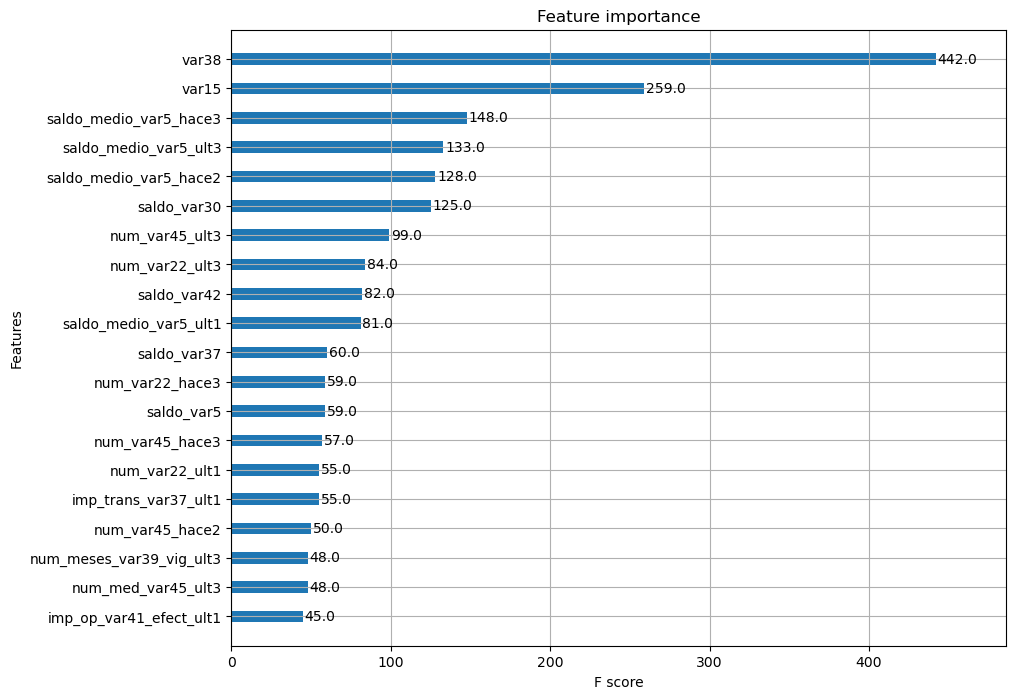

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
ROC AUC: 0.8134


In [17]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [20]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [21]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036750 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047564 seconds

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077599 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13046                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 202                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from 

[LightGBM] [Info] Total Bins 12946                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050145 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041769 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038960 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085814 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12895                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 199                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 

[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036701 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13008                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197                          
[LightGBM] [Info] [binary:BoostFromSco

[LightGBM] [Info] Total Bins 13008                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078568 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086051 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072250 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074025 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 

[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074753 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13008                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197                          
[LightGBM] [Info] [binary:BoostFromSco

[LightGBM] [Info] Total Bins 13094                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 205                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083573 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12950                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082875 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078935 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035948 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071719 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12954                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from 

[LightGBM] [Info] Total Bins 12946                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039685 -> initscore=-3.186281                                        
[LightGBM] [Info] Start training from score -3.186281                                                                  
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032084 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079165 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465                                        
[LightGBM] [Info] Start training from score -3.218465                                                                  
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078049 seconds.                
You can set `force_row_wise=true` to r

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))